# Combinational Building Blocks

Combinational logic circuits can be grouped into **larger building blocks** to make it easier to design complex systems. By using **abstraction**, we hide the low-level gate details and focus instead on what each block does. **Hierarchy** lets us build big systems by connecting simpler parts together, layer by layer. Thanks to **modularity** and **regularity**, each block has clear, well-defined interface, so we can think of it as a black box and reuse it easily. For example, common building blocks include multiplexers, decoders, arithmetic circuits, and seven-segment display decoders. These blocks perform useful functions that show up repeatedly in digital designs. As we go forward, we’ll see how combining these simple blocks helps us build much more powerful systems, like a microprocessor, without getting lost in the details of every single gate.

## Multiplexers

Multiplexers are among the most commonly used combinational circuits. They **choose an output from among several possible inputs, based on the value of a select signal**. A multiplexer is sometimes called a **mux**. The following figure shows the schematic symbol and truth table for a 2:1 mux: 

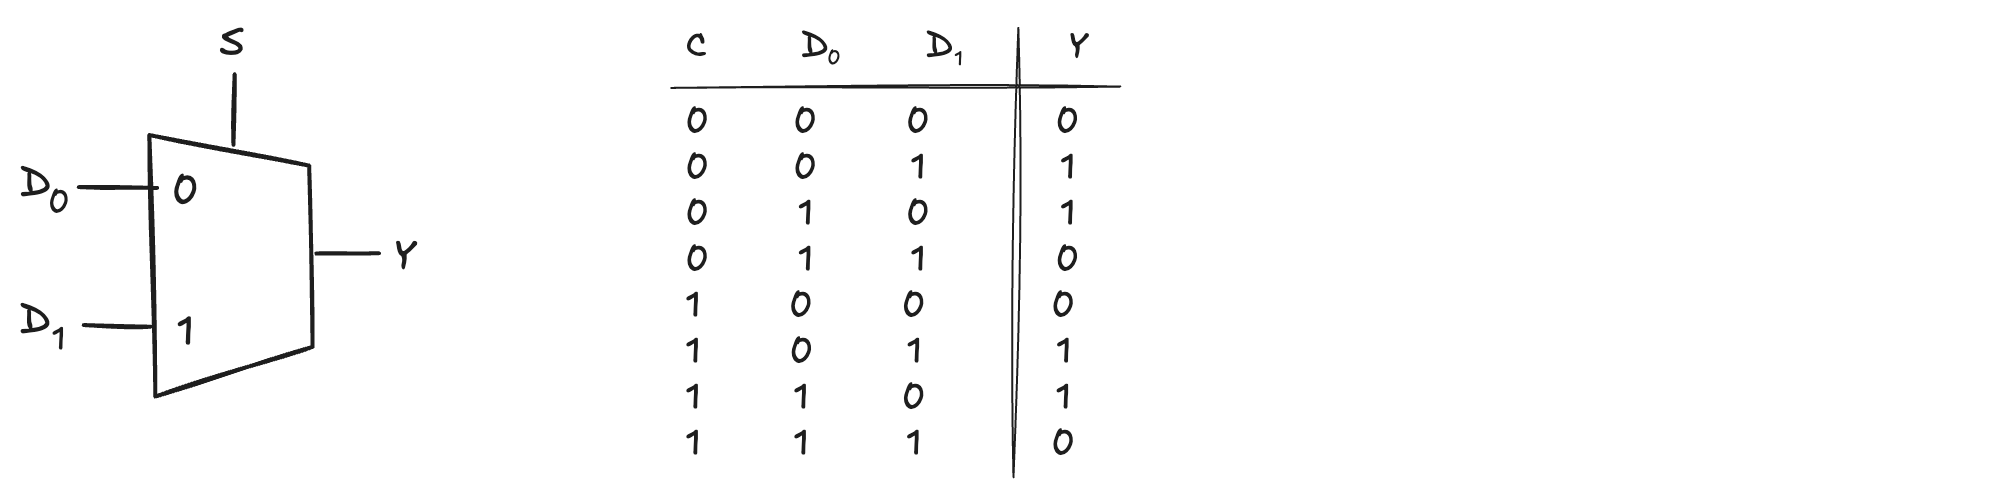

The multiplexer chooses between the two data inputs, based on the select value, which is also called a **control signal** because it controls what the multiplexer does. We can be built it from sum-of-products logic and derive its Boolean equation: 

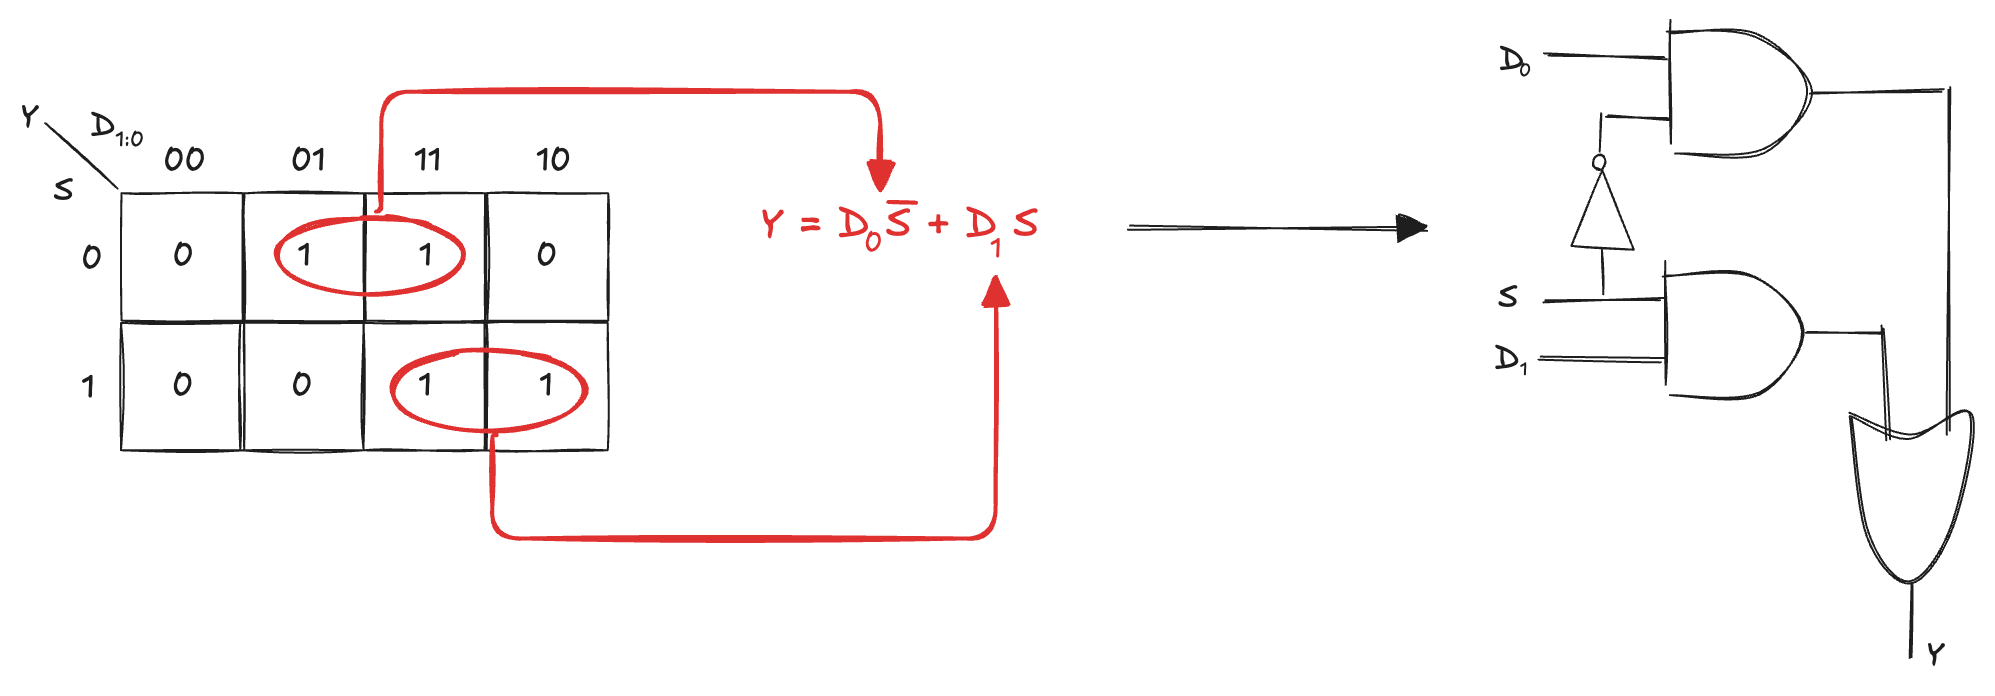

$\text{mux}(D_0, D_1, S) = D_0 \; \overline{S} + D_1 \; S$

### Wider Multiplexers

A 4:1 multiplexer has four data inputs and one output. In that case, two select signals are needed to choose among the four data inputs. It can be built using sum-of-products logic or multiple 2:1 multiplexers:

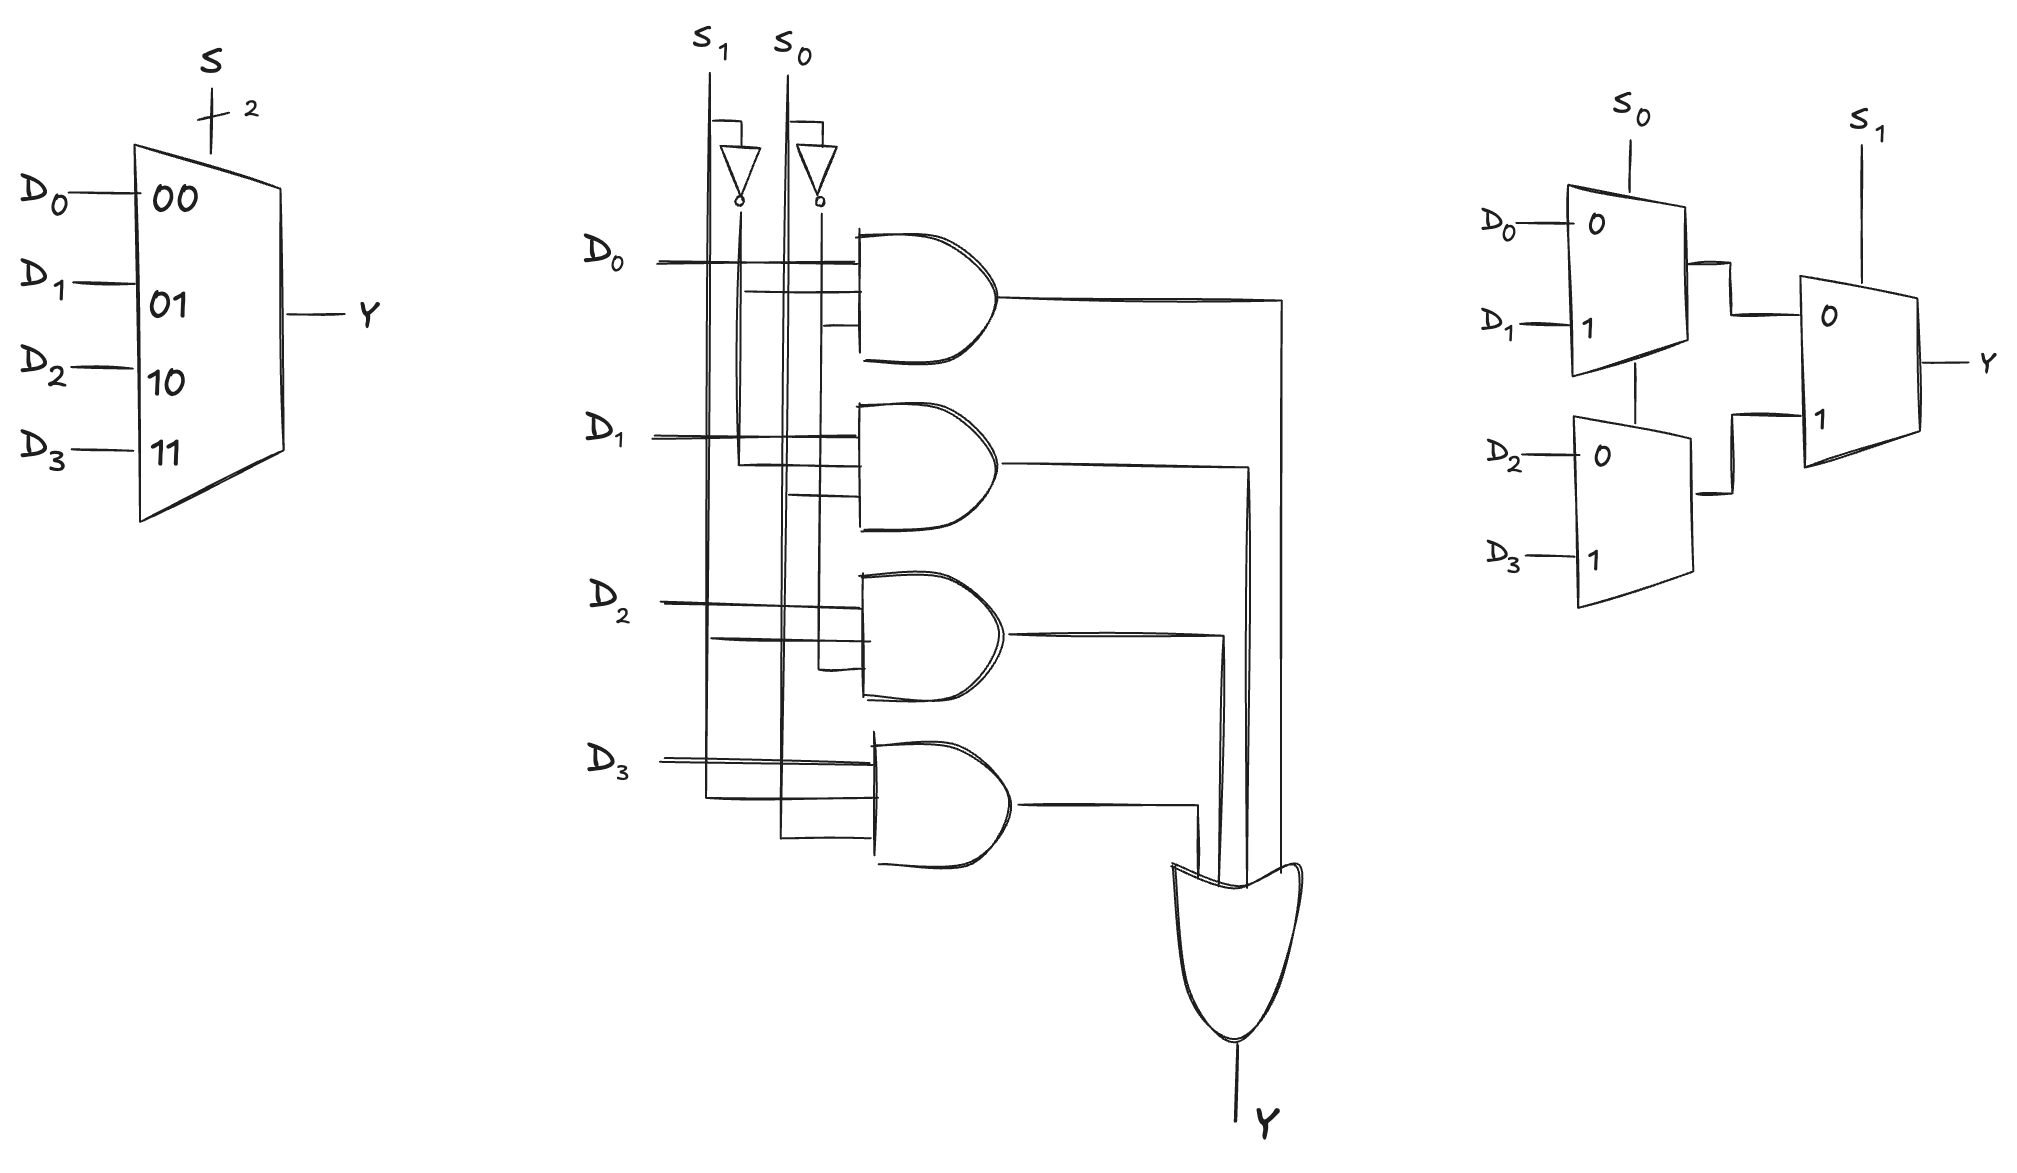

Wider multiplexers, such as 8:1 and 16:1 multiplexers, can be built by expanding the methods. In general, an N:1 multiplexer needs log_2 N select lines.  

We can think of mux as a **switchboard** that connects only one input at a time, **allowing different data sources to share the same output line efficiently**. This makes it possible to handle many inputs in a controlled, sequential way without needing separate circuits for each one:

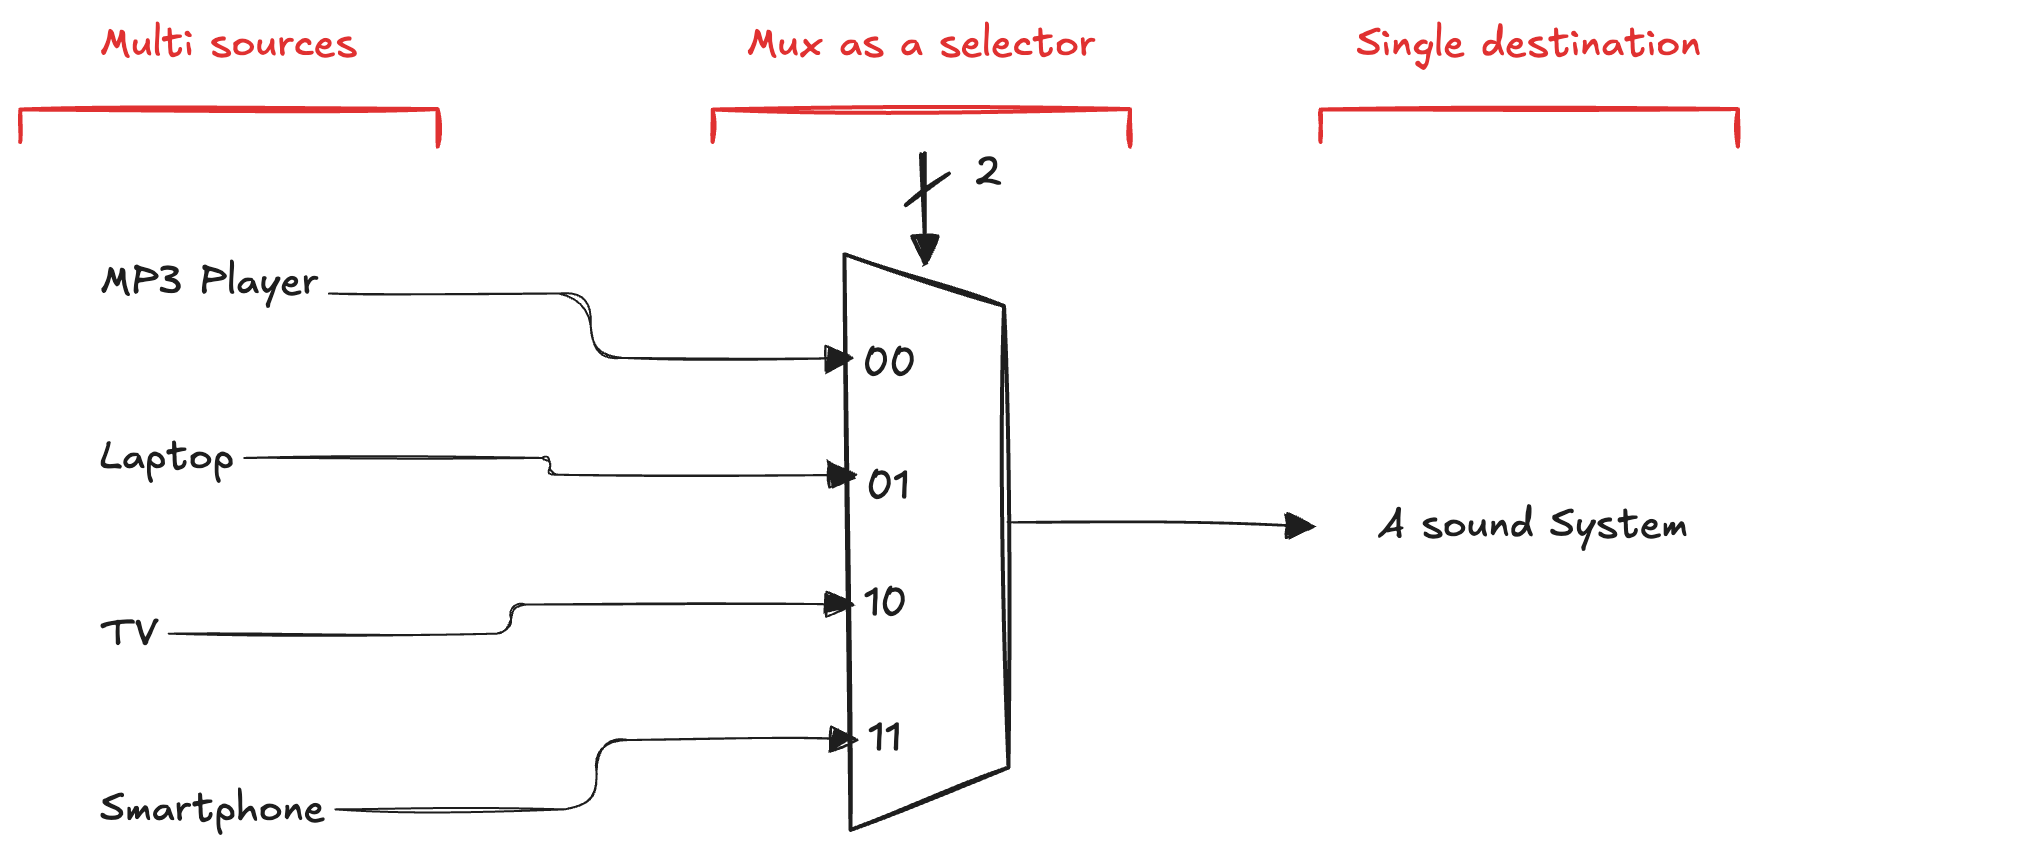

### Multiplexer Logic

Multiplexers aren’t just for routing data, they can also serve as **lookup tables** for logic operations. For instance, the figure below illustrates how we can use a 4:1 multiplexer to implement the behavior of a two-input AND gate by selecting the right output for each input combination:

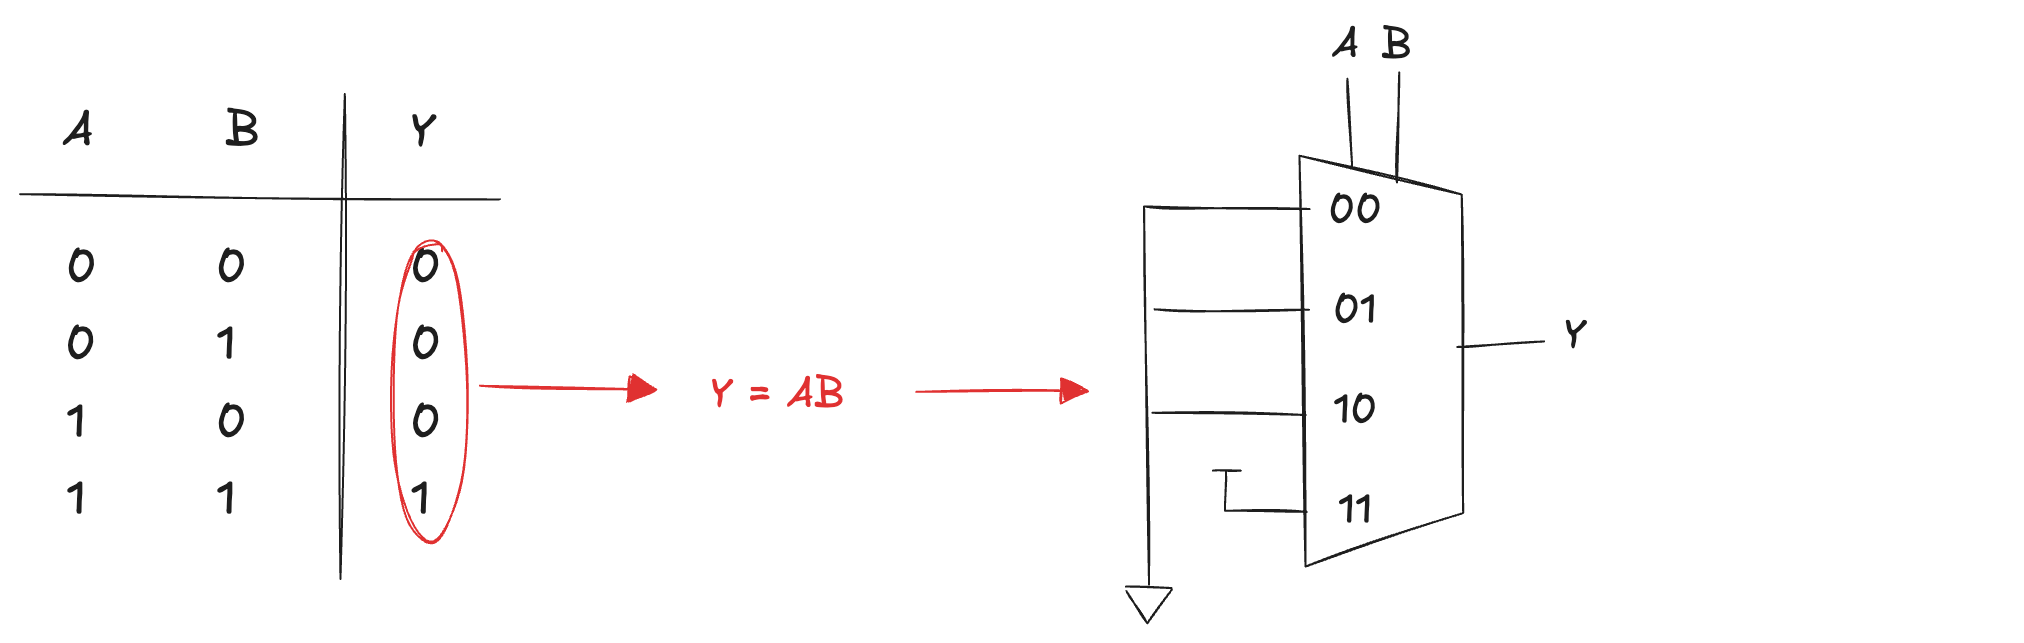

The **select lines are used as input** for the multiplexer. The **inputs lines are wired to either 0 or 1, based on the rows of the truth table** for the logic function we want to implement. In general, a multiplexer with 2^N inputs can be configured to perform any logic function of N variables. By simply changing how the data inputs are connected, **the multiplexer can be reprogrammed** to carry out a completely different function.

It’s possible **to reduce the size of the multiplexer by half** and still implement any N input logic function using only a 2^(N-1) input multiplexer. The key idea is to provide one of the input variables directly to the multiplexer’s data inputs instead of hard-wiring them to 0 or 1. To see how this works in practice, we can implement a two-input AND gate using a simple 2:1 multiplexer.

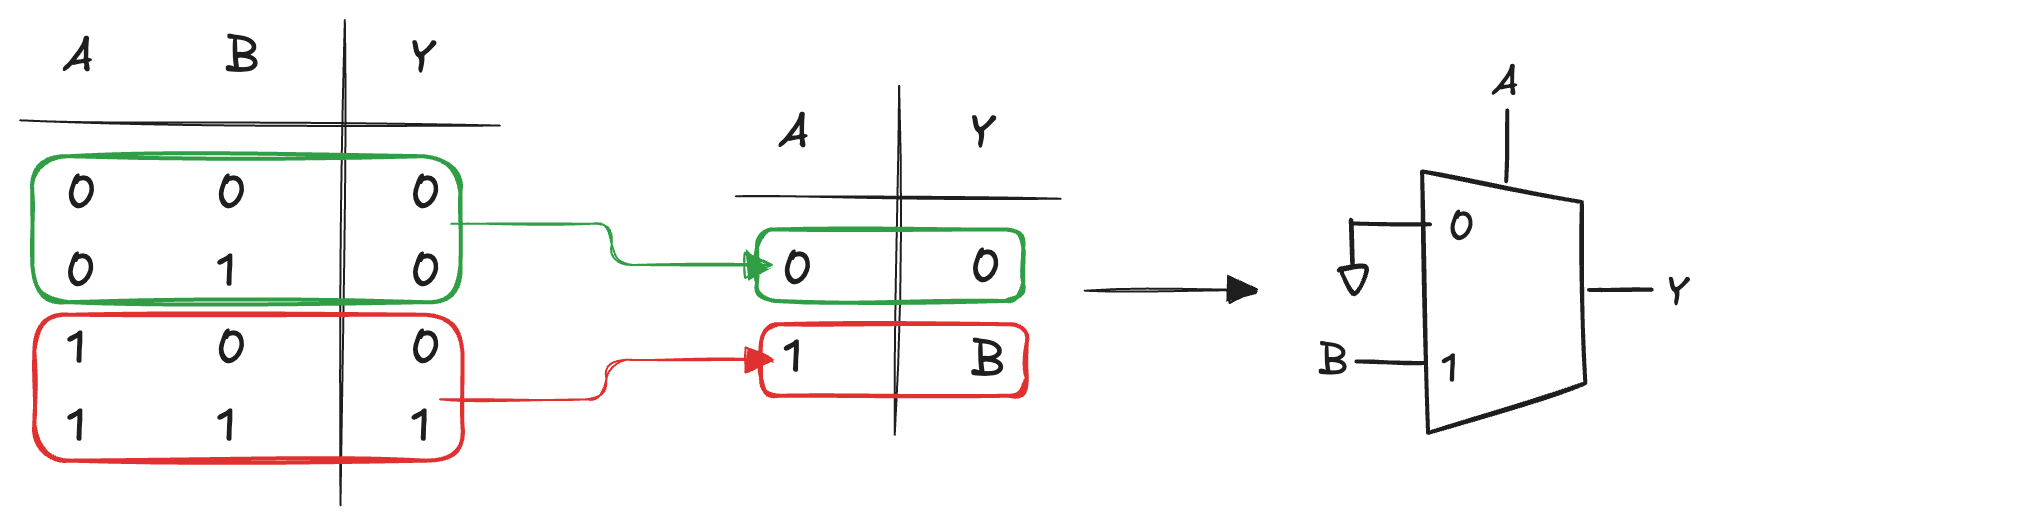

We begin with the complete truth table for the logic function, then combine pairs of rows to eliminate the rightmost input variable. This allows us to rewrite the output in terms of this variable, reducing the number of required data inputs. The multiplexer is then used as a lookup table based on this reduced truth table. To illustrate this approach further, let’s consider a more complex example: 

$\displaystyle Y = A \; \overline{B} + \overline{B} \; \overline{C} + \overline{A} \; B \; C$

Suppose to have an 8:1 multiplexer for the implementation. How can this function be realized:

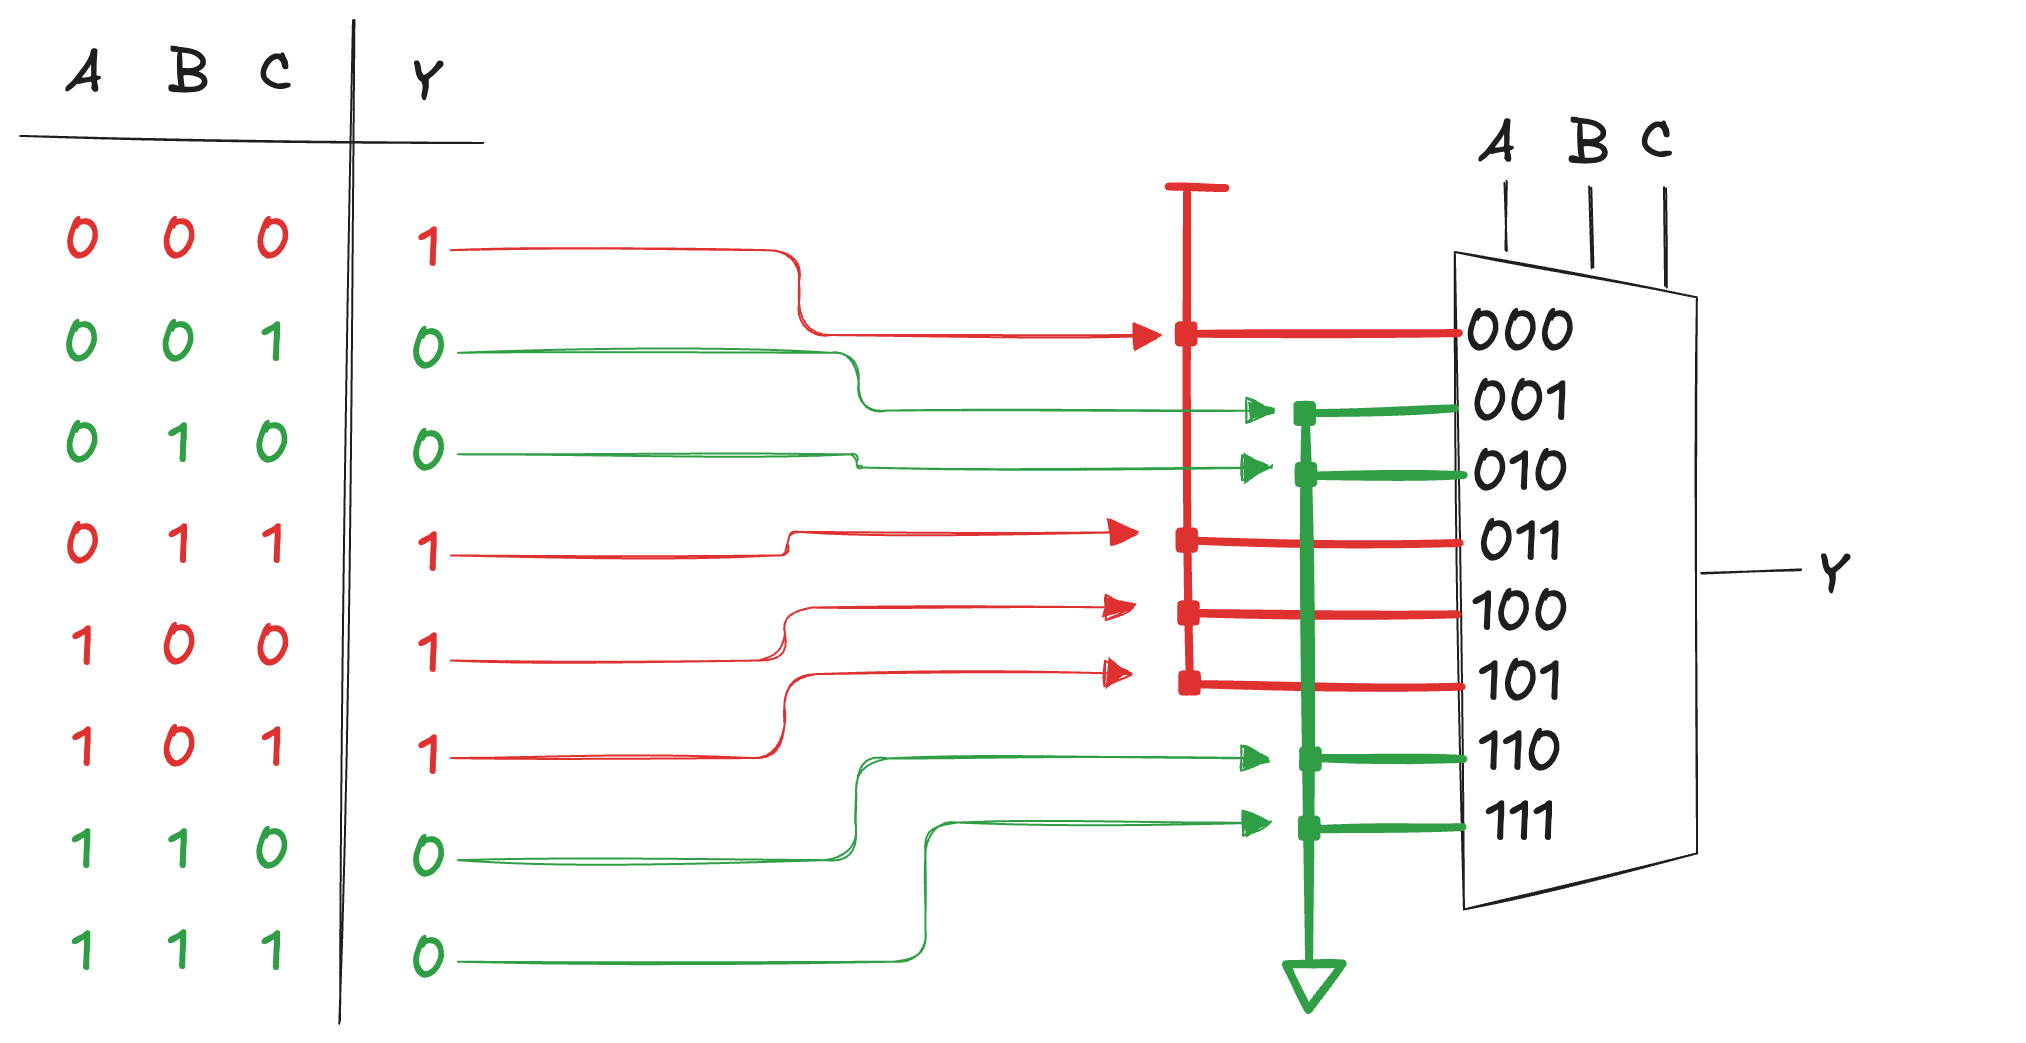

Now suppose that the original 8:1 multiplexer is damaged and only a 4:1 multiplexer and an inverter are available as replacement components. Is it possible to implement the function using only these parts?

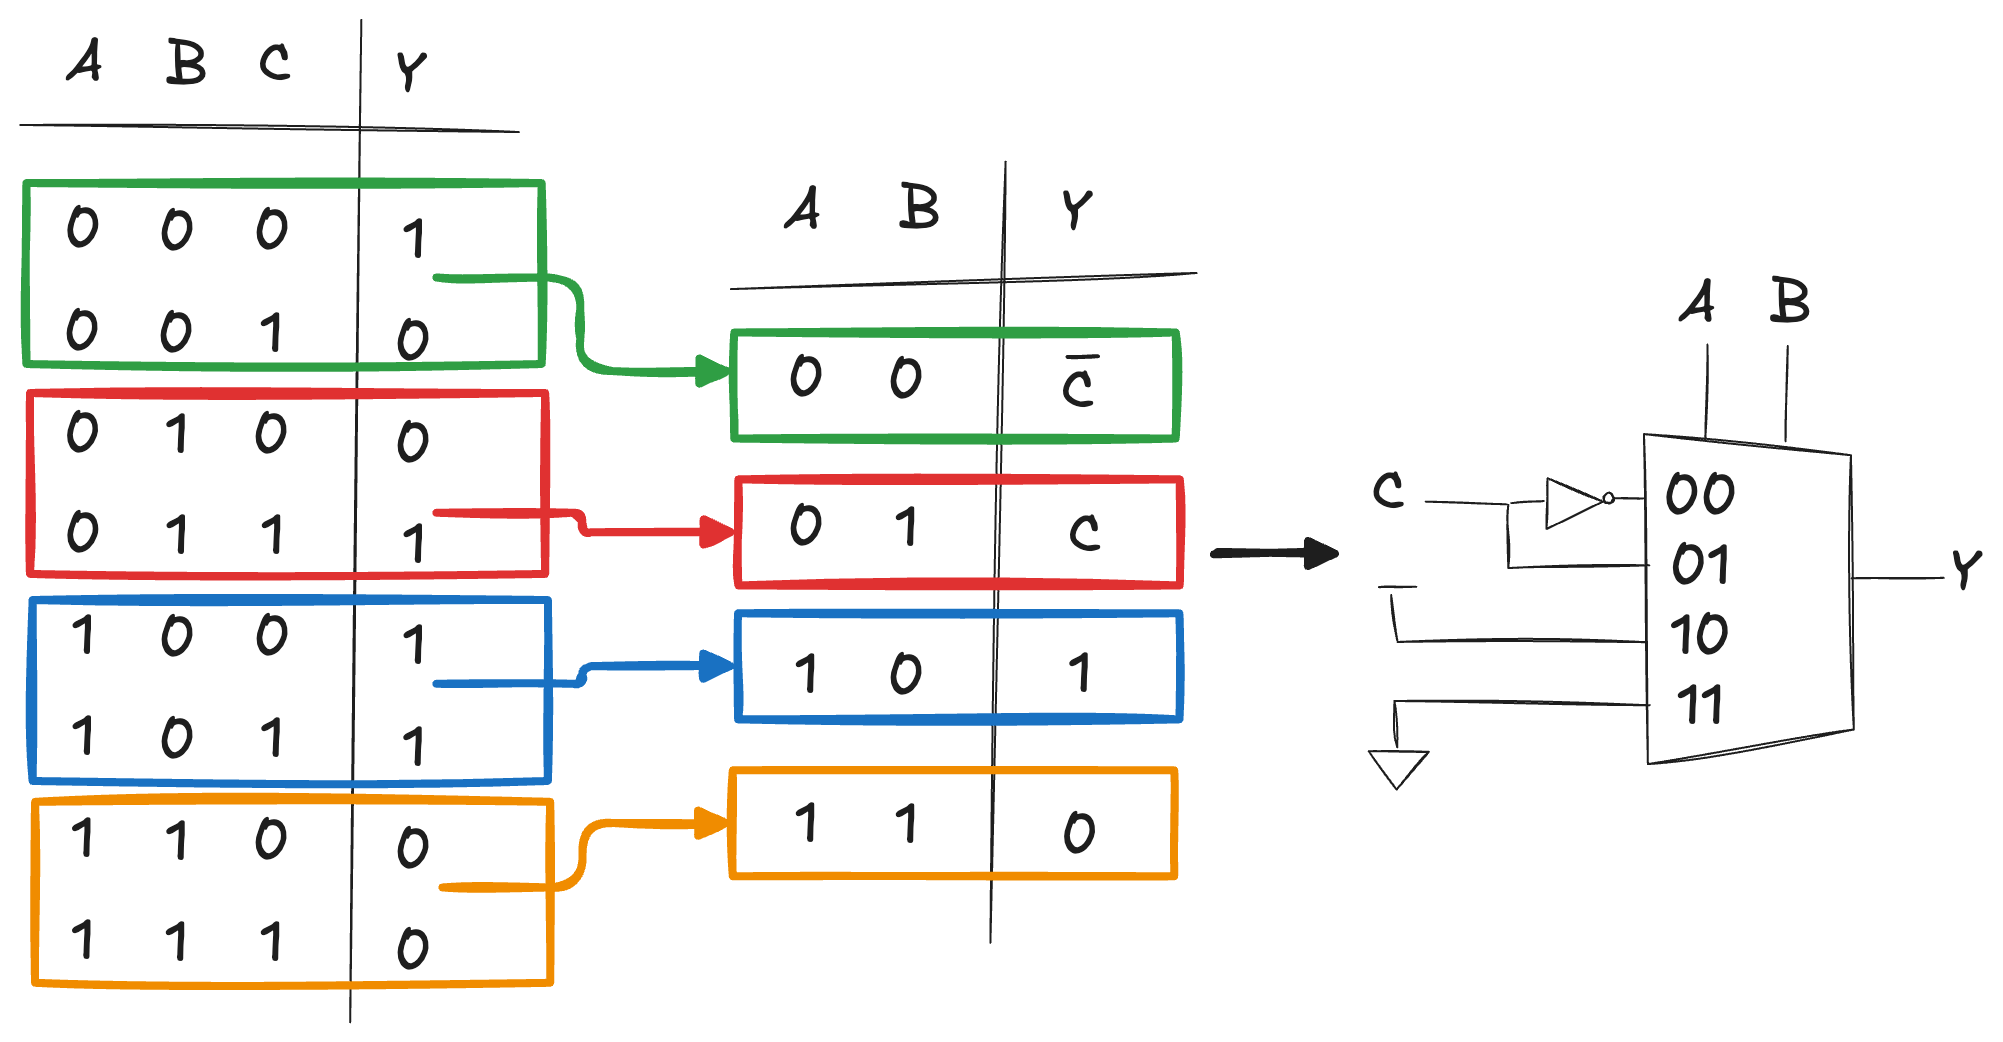

Vediamo ora la descrizione VHDL di un multiplexer 4:1.

In [ ]:
entity mux_4_1 is
    port( s0, s1: in std_logic;
          a, b, c, d: in std_logic;
          y: out std_logic
    );
end mux_4_1;

architecture rtl of mux_4_1 is
begin
    y <= a when s0='0' and s1='0' else
         b when s0='0' and s1='1' else
         c when s0='1' and s1='0' else
         d when s0='1' and s1='1' else
         '-';
end rtl;

Il costrutto "with ... select" offre la possibilità di rendere la specifica più sintetica e leggibile:

In [ ]:
architecture rtl of mux_4_1 is
    signal sel: std_logic_vector(0 to 1);
begin
    with sel select
        y <= a when "00",
             b when "01",
             c when "10",
             d when "11",
             '-' when others;
end rtl;

Supponiamo ora che i segnali di ingresso, e di conseguenza il segnale di uscita, non siano di un bit bensì siano segnali a 8 bit. La nuova entity per il multiplexer in esame diventa la seguente:

In [ ]:
entity mux_4_1_8bit is
    port( s0, s1: in std_logic;
           a, b, c, d: in std_logic_vector(0 to 7);
           y: out std_logic_vector(0 to 7)
    );
end mux_4_1_8bit;

architecture rtl of mux_4_1_8bit is
    signal sel: std_logic_vector(0 to 1);
begin
    with sel select
        y <= a when "00",
             b when "01",
             c when "10",
             d when "11",
             "--------" when others;
end rtl;

Vediamo ora, a titolo di esempio, come è possibile specificare un multiplexer 4-a-1 generico per segnali di dimensione variabile, grazie alla parametrizzazione che si realizza mediante il costrutto generic:

In [ ]:
entity mux_4_1_Nbit is
    generic( N: integer );
    port( sel: in std_logic_vector(0 to 1);
          a, b, c, d: in std_logic_vector(0 to N-1);
          y: out std_logic_vector(0 to N-1)
    );
end mux_4_1_Nbit;

La dichiarazione di generic introduce nell’entity un parametro, N, che indica la dimensione dei segnali di ingresso e del segnale di uscita. Quando questo componente sarà utilizzato nel progetto, sarà necessario assegnare un valore specifico e costante al parametro N. Ciò fatto, lo strumento di sintesi sarà in grado di realizzare il componente in modo consistente con la dimensione assegnata ai segnali. Consideriamo ora l’architectura,l’unica parte che mostra una dipendenza esplicita dalla dimensone dei segnali è l’assegnamento del valore costante costituito da tutti don’t care. Non conoscendo a priori la dimensione del segnale di uscita, non è possibile utilizzare una costante predefinita per tale assegnamento. A tal fine il VHDL dispone di un costrutto che permette di assegnare un valore costante ad ogni elemento di un vettore, sia quando la dimensione è nota a priori, sia quando non lo è:

In [ ]:
architecture rtl of mux_4_1_Nbit is
begin
    with sel select
        y <= a when "00",
             b when "01",
             c when "10",
             d when "11",
            (others => ’-’) when others;
end rtl;

## Decoders

A decoder is a circuit with N inputs and 2^N outputs. For each possible input combination, **exactly one output line is asserted** (set to 1), while all others remain low. The figure below illustrates a 2-to-4 decoder as an example:

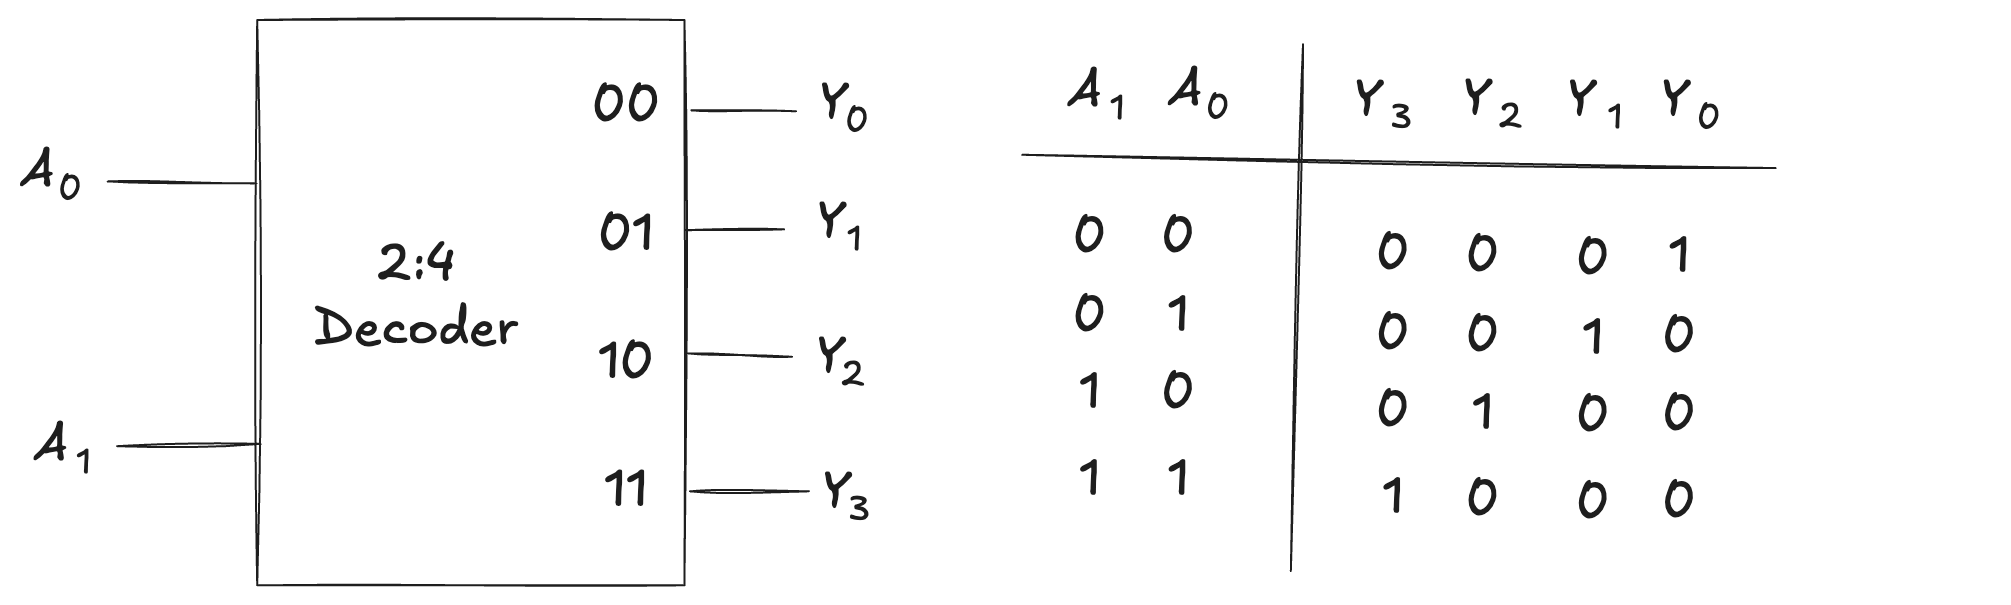

The outputs are called **one-hot**, because exactly one is "hot" (HIGH) at
a given time.

A 2-to-4 decoder can be implemented using four AND gates and two NOT gates. Each AND gate generates one output by combining the inputs in either their true or complemented form, according to the required minterm.

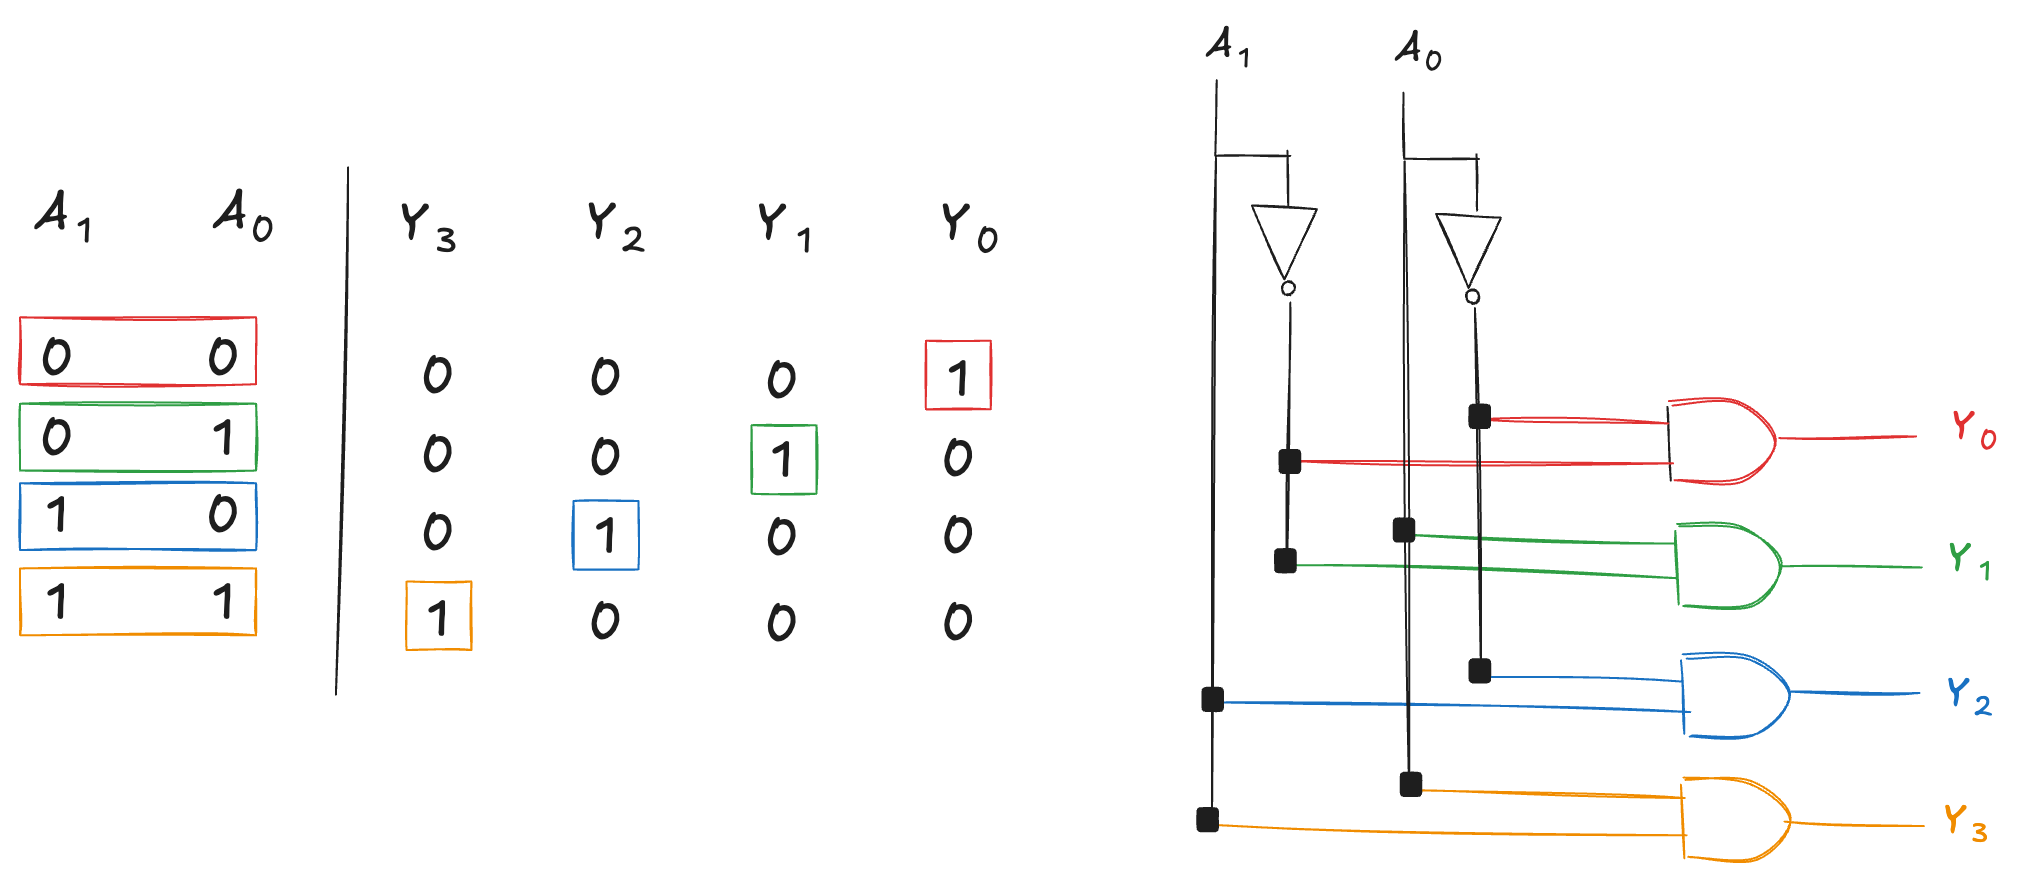

Starting from the truth table, it is straightforward to write the corresponding VHDL description:

In [ ]:
entity decoder_2_4 is
    port( dec_in: in std_logic_vector(0 to 1);
          dec_out: out std_logic_vector(0 to 3)
    );
end decoder_2_4;

architecture rtl of decoder_2_4 is
begin
    with dec_in select
    dec_out <= "0001" when "00",
               "0010" when "01",
               "0100" when "10",
               "1000" when "11",
               "----" when others;
end rtl;

In general, an N-to-2^N decoder can be constructed using 2^N AND gates, each with N inputs. Each AND gate generates one possible combination of the input variables in their true or complemented form, so that each output corresponds to a single minterm of the input variables. 

This type of circuit is often used to **decode a memory address**. The inputs represent the memory address in standard binary form, while the output activates exactly one of the memory lines that needs to be accessed:

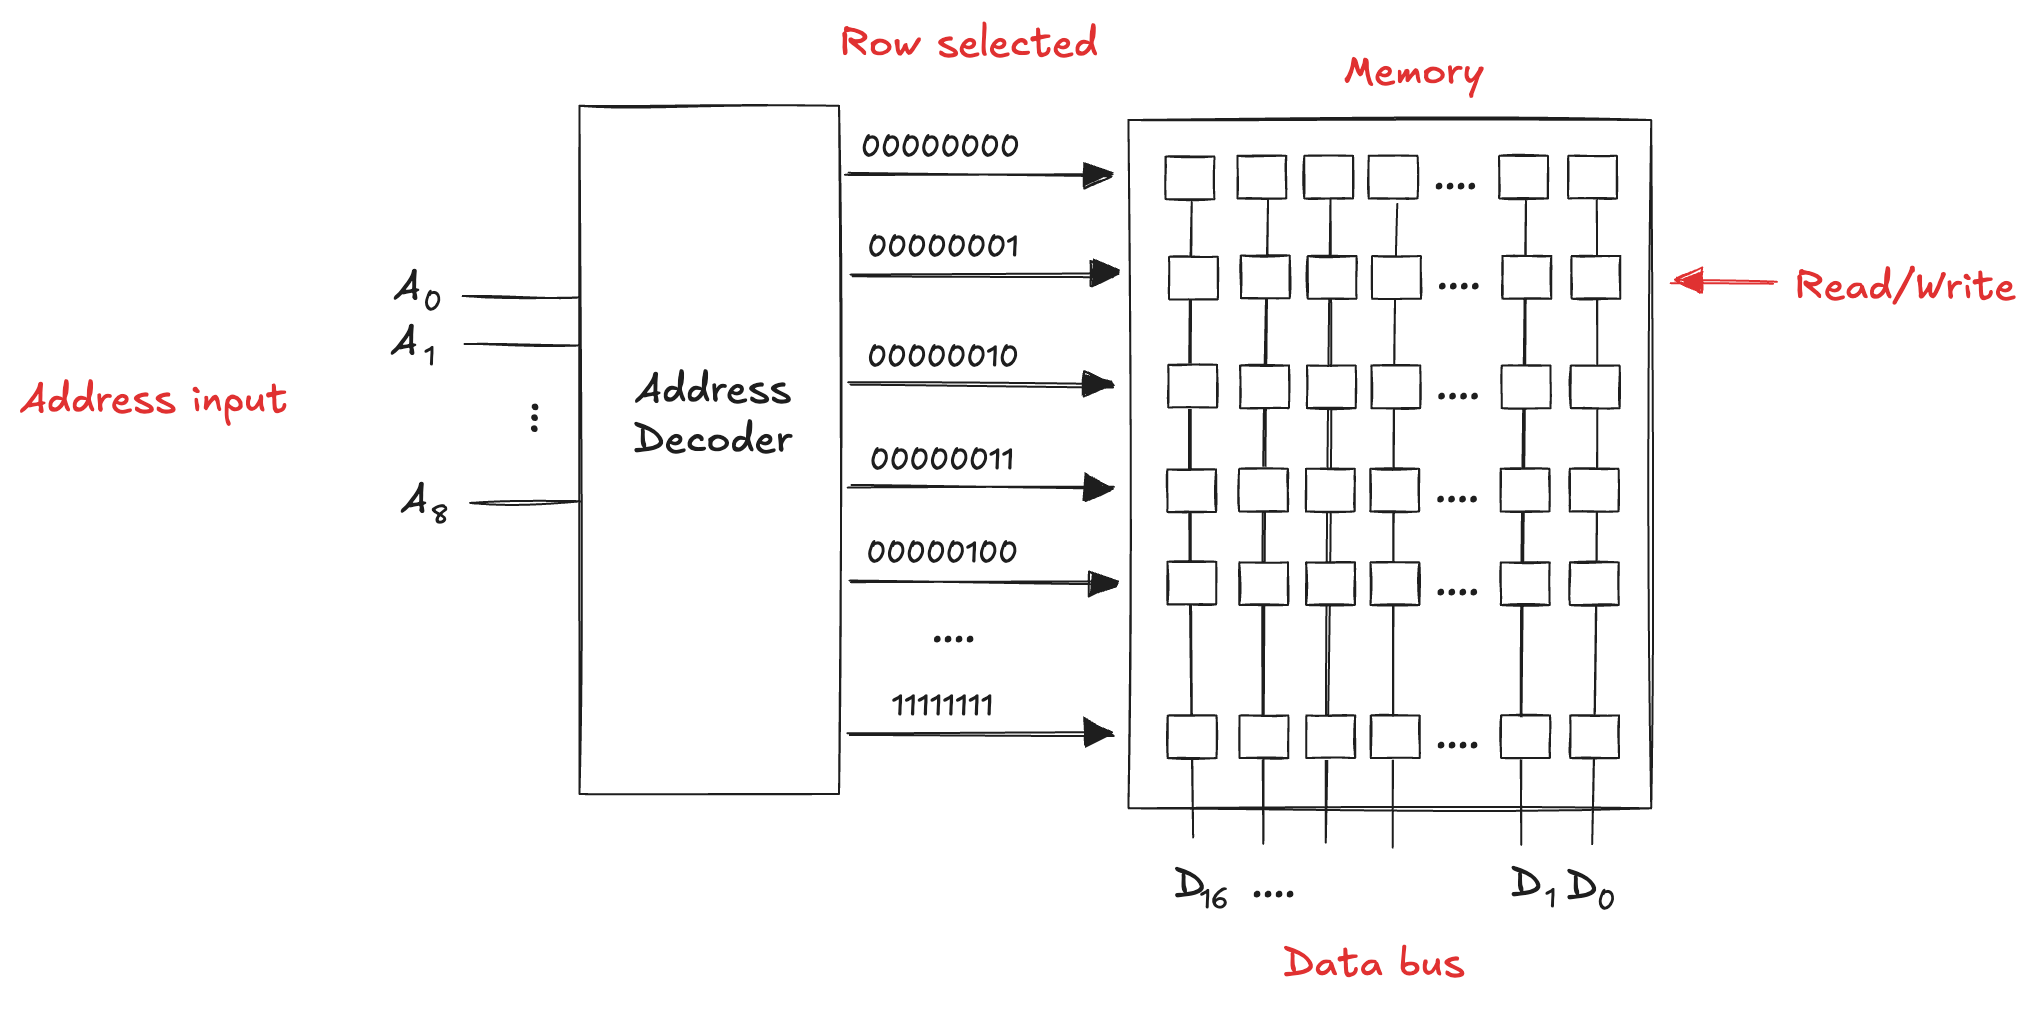

### Decoder Logic

Decoders can be combined with OR gates to **build logic functions**. The following figure shows the two-input XNOR function implemented using a 2:4 decoder and a single OR gate. Because each output of a decoder represents a single minterm, the function is built as the OR of all of the minterms in the function:

$\displaystyle Y = \overline{A \oplus B} = \overline{A \; B} + A \; B$

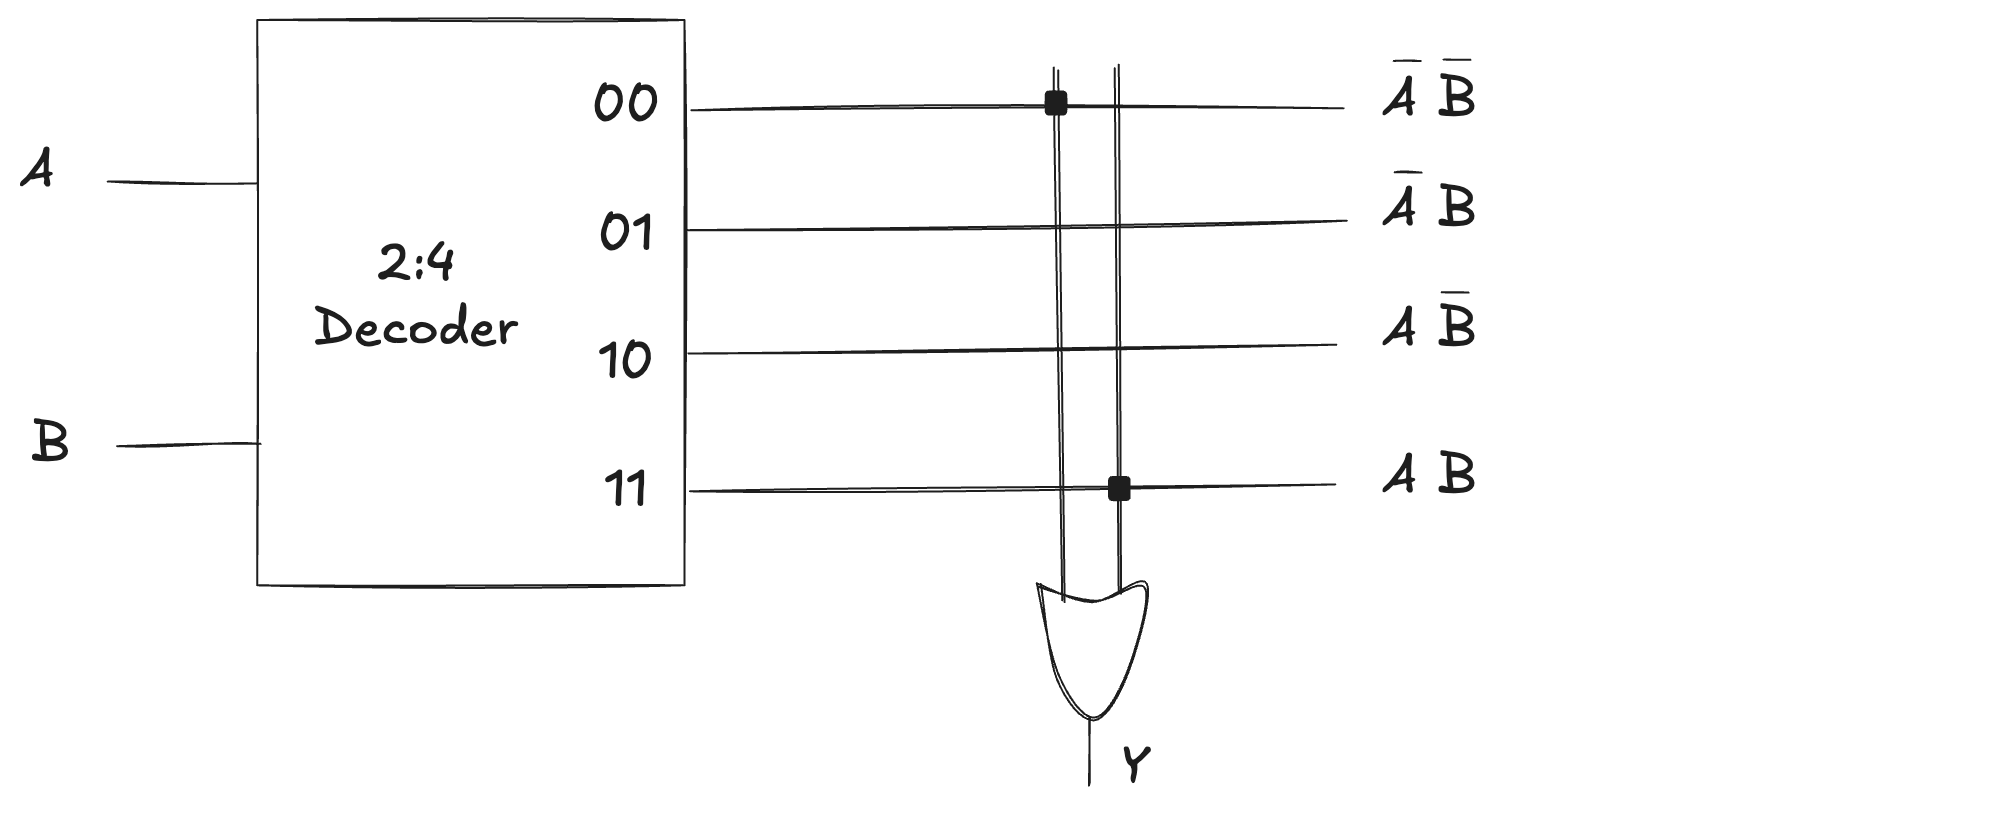

An N-input function with M 1 in the truth table can be built with an N:2^N decoder and an M-input OR gate attached to all of the minterms containing 1 in the truth table. This concept will be applied to the building of read-only memories (ROMs).

## Adder

Addition is one of the most common operations in digital systems. We start considering how to add two 1-bit binary numbers. We then extend to N-bit binary numbers. Adders also illustrate trade-offs between speed
and complexity.

### Half Adder

A half adder has two inputs, A and B, and two outputs: S (sum) and Cout (carry out). The sum output represents the addition of A and B. When both inputs are 1, their sum is 2, which cannot be expressed with a single binary digit. Instead, the sum is split: S is 0 and the overflow is indicated by Cout. A half adder can be implemented using an XOR gate for the sum and an AND gate for the carry:

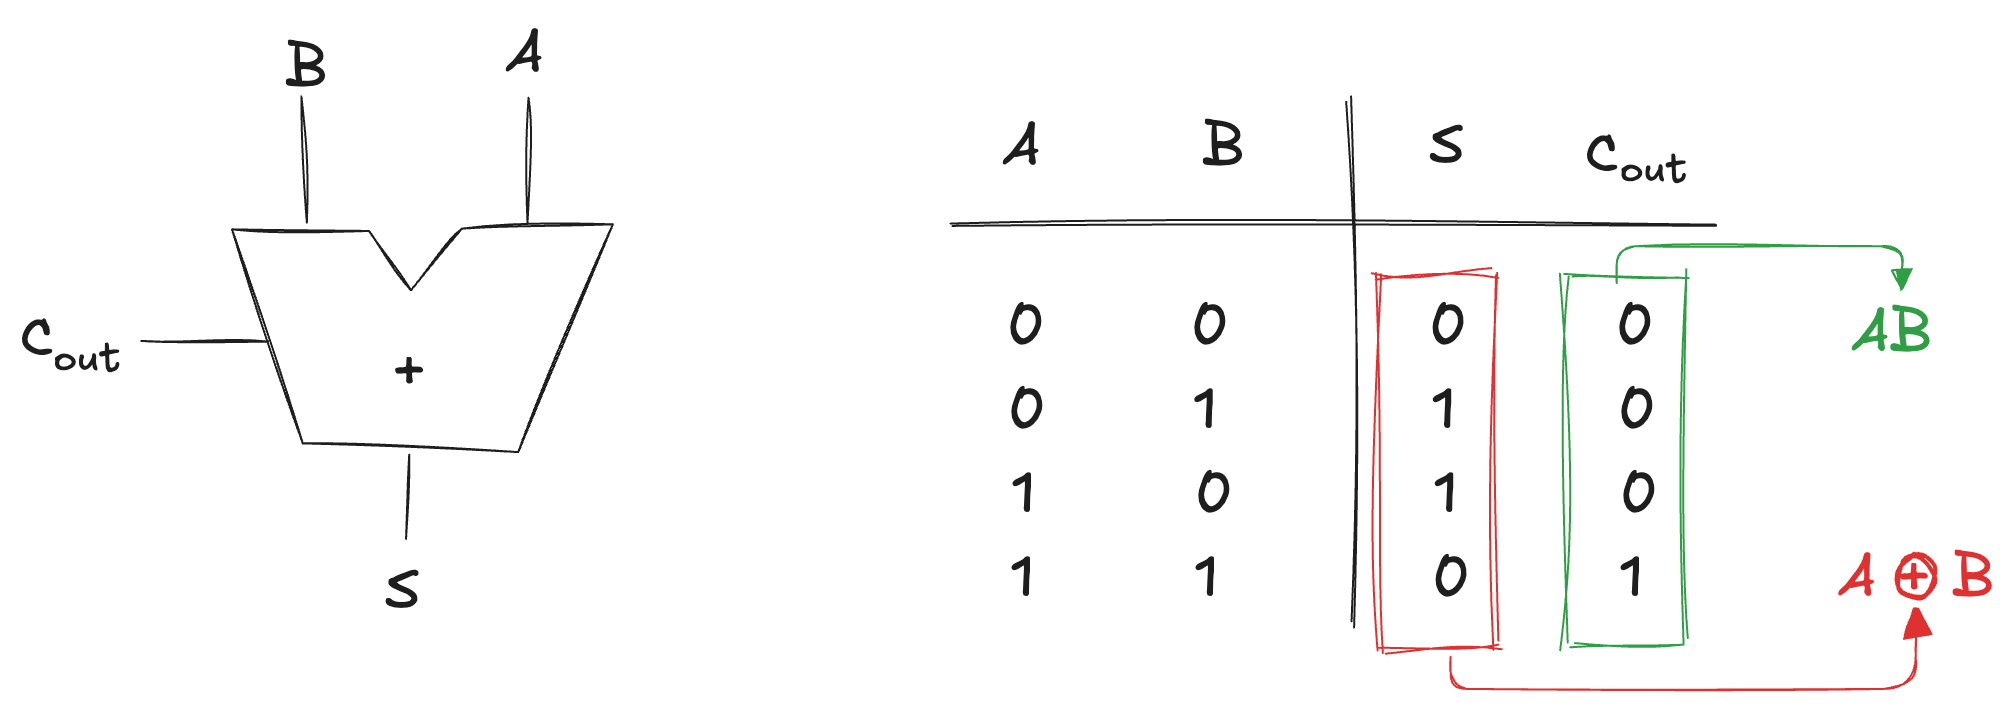

In a multi-bit adder, the carry-out from one bit position must be passed as a carry-in to the next more significant bit. However, a half adder does not have a Cin input, so it cannot receive the carry from the previous stage.

### Full Adder

A full adder accepts the carry in Cin:

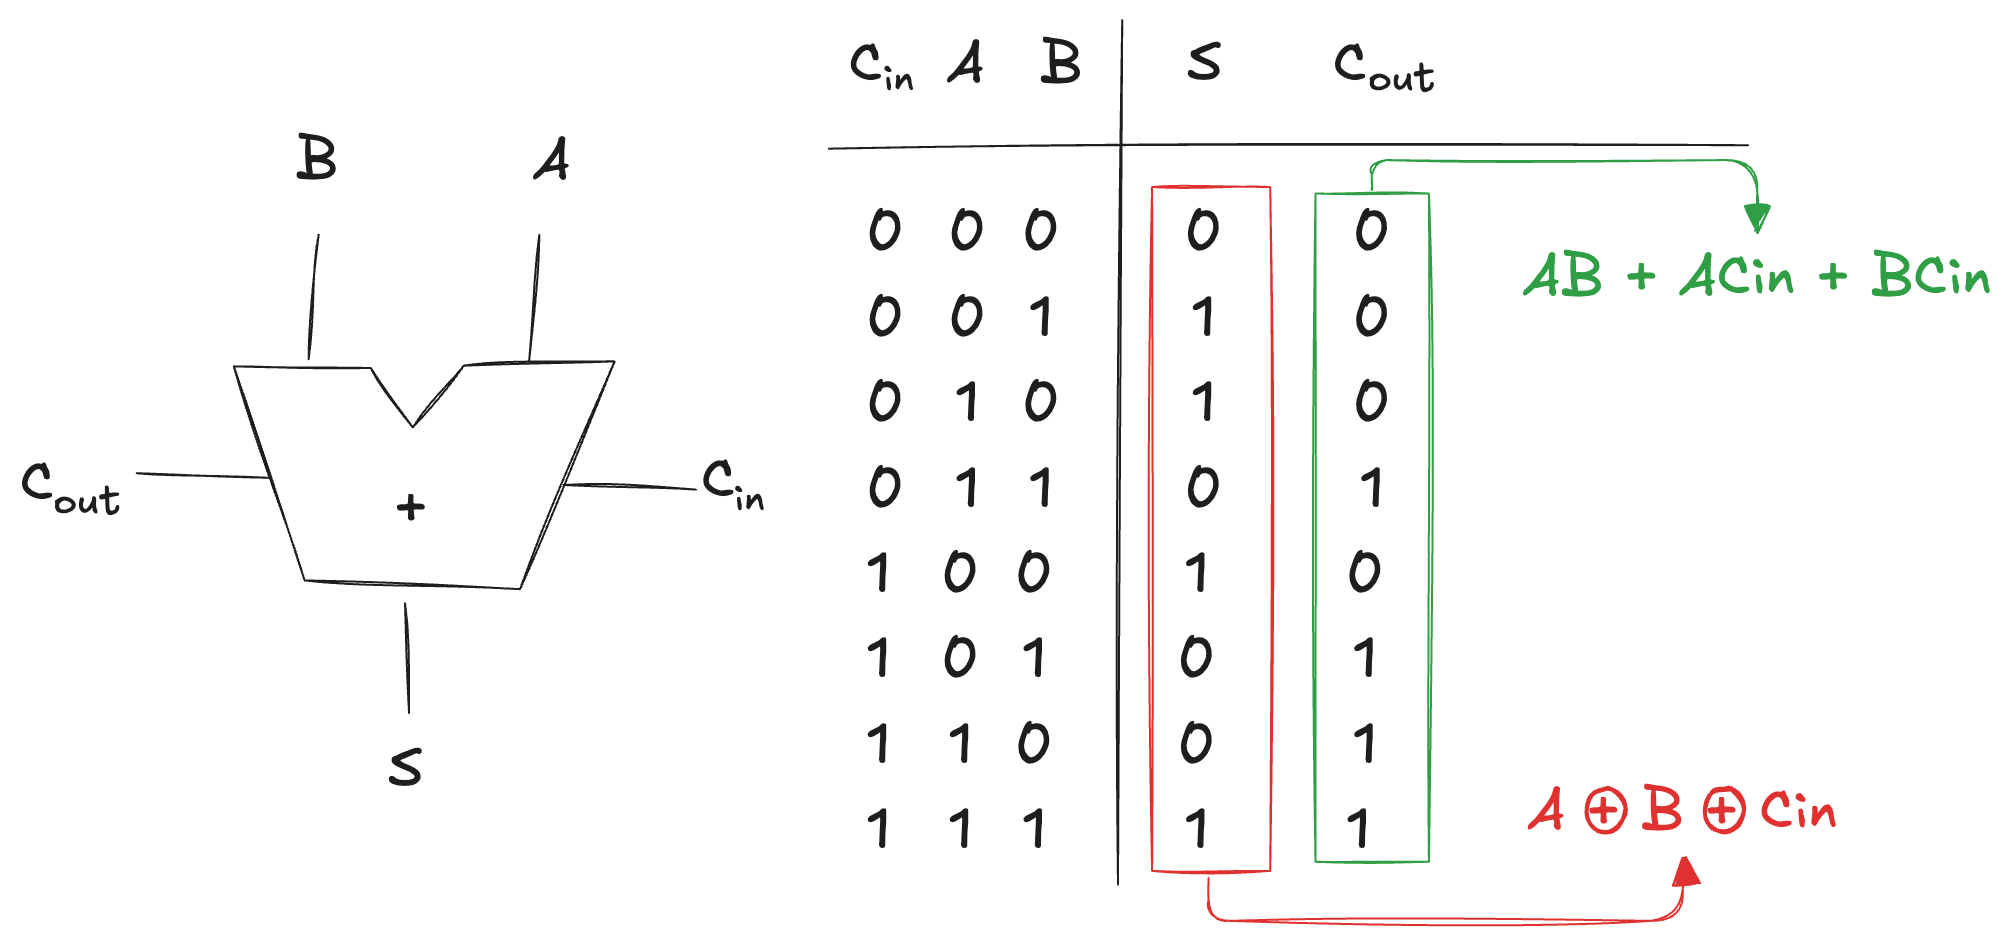

### Ripple-carry adder

An N-bit adder sums two N-bit inputs, A and B, along with a carry-in (Cin), to produce an N-bit output sum (S) and a carry-out (Cout). This type of adder is commonly referred to as a **carry propagate adder (CPA)** because the carry-out from each bit position propagates to the next higher bit. The simplest implementation **chains together N full adders**, where the Cout of one stage serves as the Cin for the next:

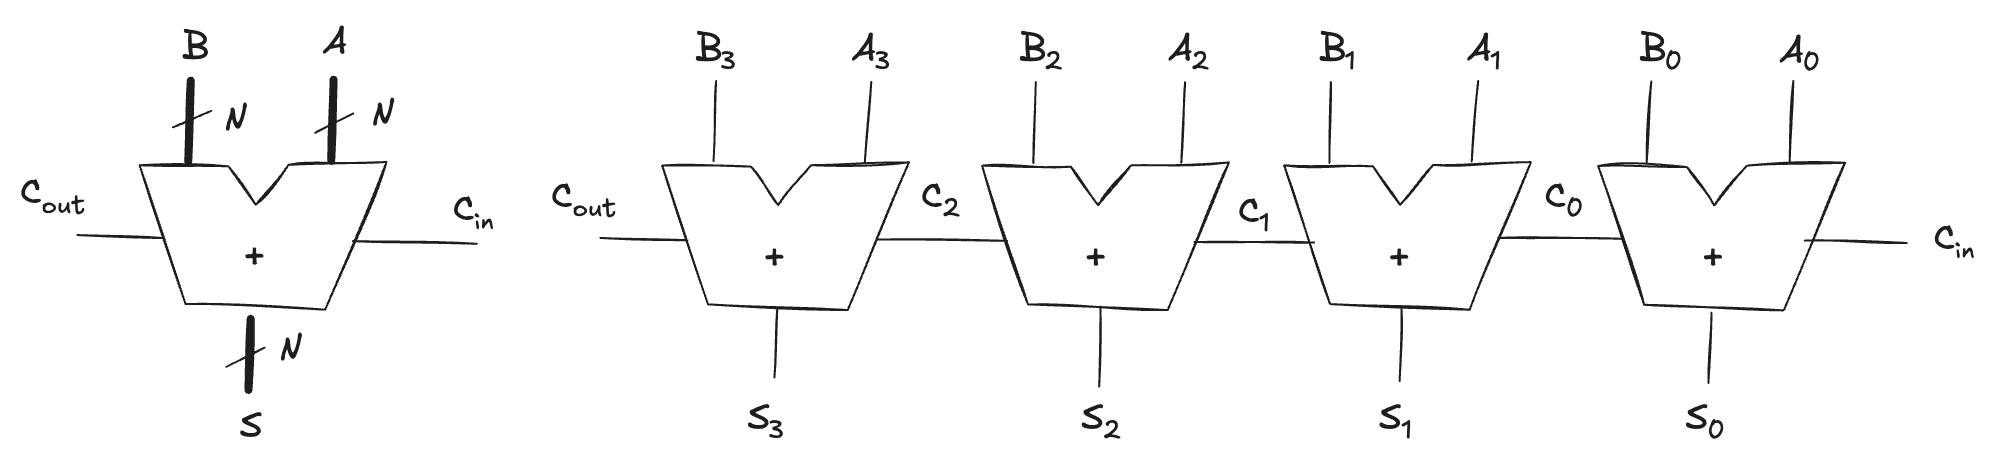

This is known as a **ripple-carry adder**. It is a good example of modularity and regularity: the full adder module is reused multiple times to build a larger system. However, it has the drawback of being **slow for large values of N**. For example, in a 32-bit operation, S31 depends on C30, which depends on C29, and so on, all the way back to the initial Cin. As a result, the adder’s delay increases linearly with the number of bits:

$\displaystyle T_{ripple} = N \cdot T_{FA}$

### Carry-Lookahead Adder

The fundamental reason why large ripple-carry adders are slow is that the carry signal must propagate through every bit in the adder.

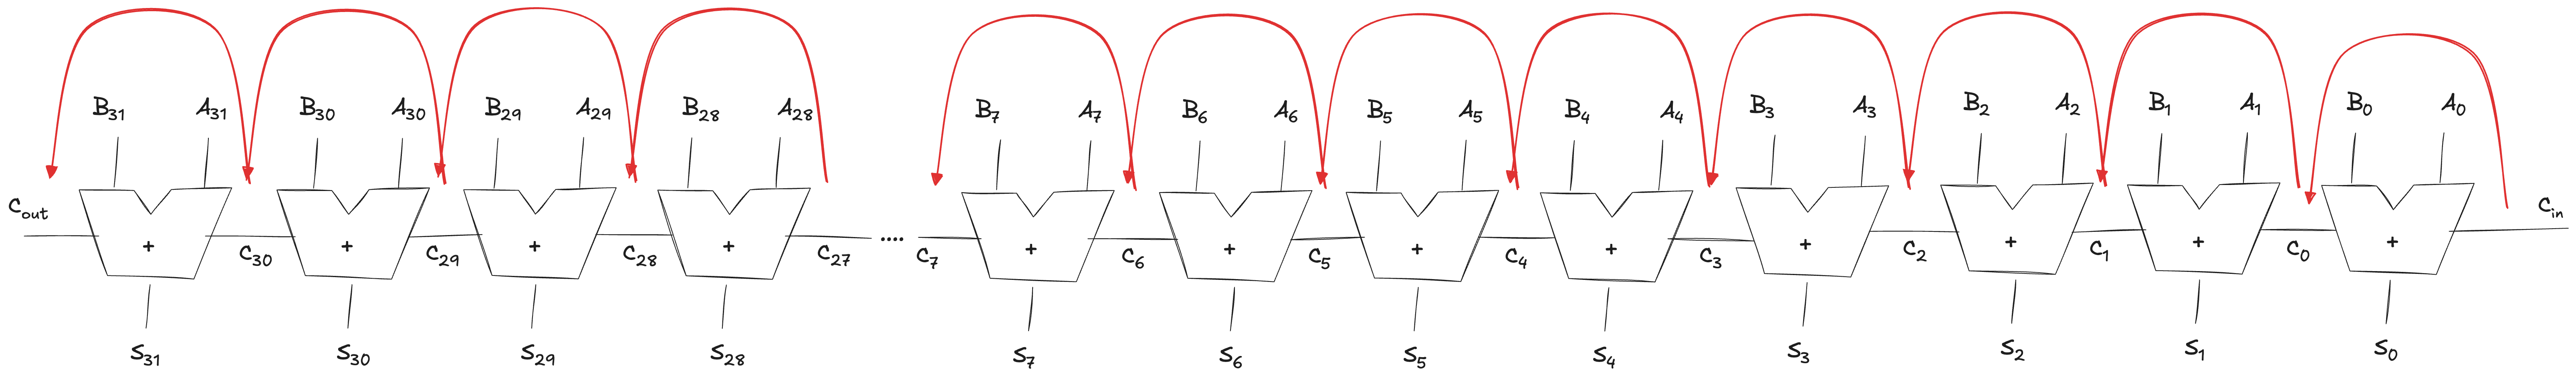

A **carry-lookahead adder (CLA)** addresses this problem by dividing the adder into blocks and adding circuitry that can quickly determine the carry-out of each block as soon as its carry-in is known. In this way, **the adder "looks ahead" across blocks** instead of waiting for the carry to ripple through every full adder within a block:

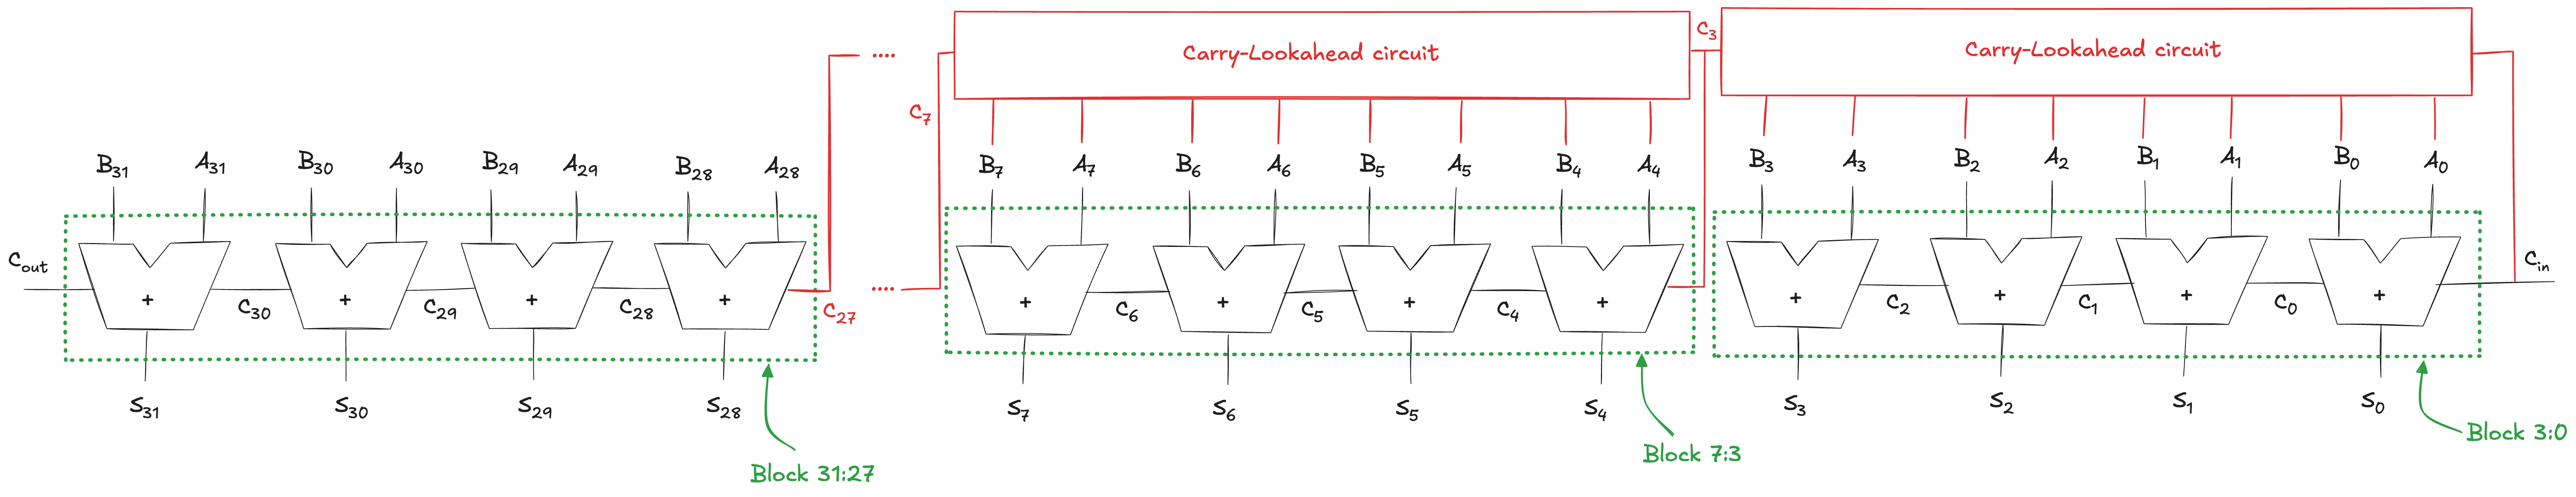

CLAs use **generate** and **propagate** signals to describe how each block determines its carry-out. The i-th bit position of an adder is said to generate a carry if it produces a carry-out regardless of the carry-in, this happens when both inputs are 1:

$\displaystyle G_i = A_i \; B_i$

The i-th bit position is said to propagate a carry if it produces a carry-out whenever there is a carry-in, this is guaranteed when at least one of its inputs is 1:
 
$\displaystyle P_i = A_i + B_i$

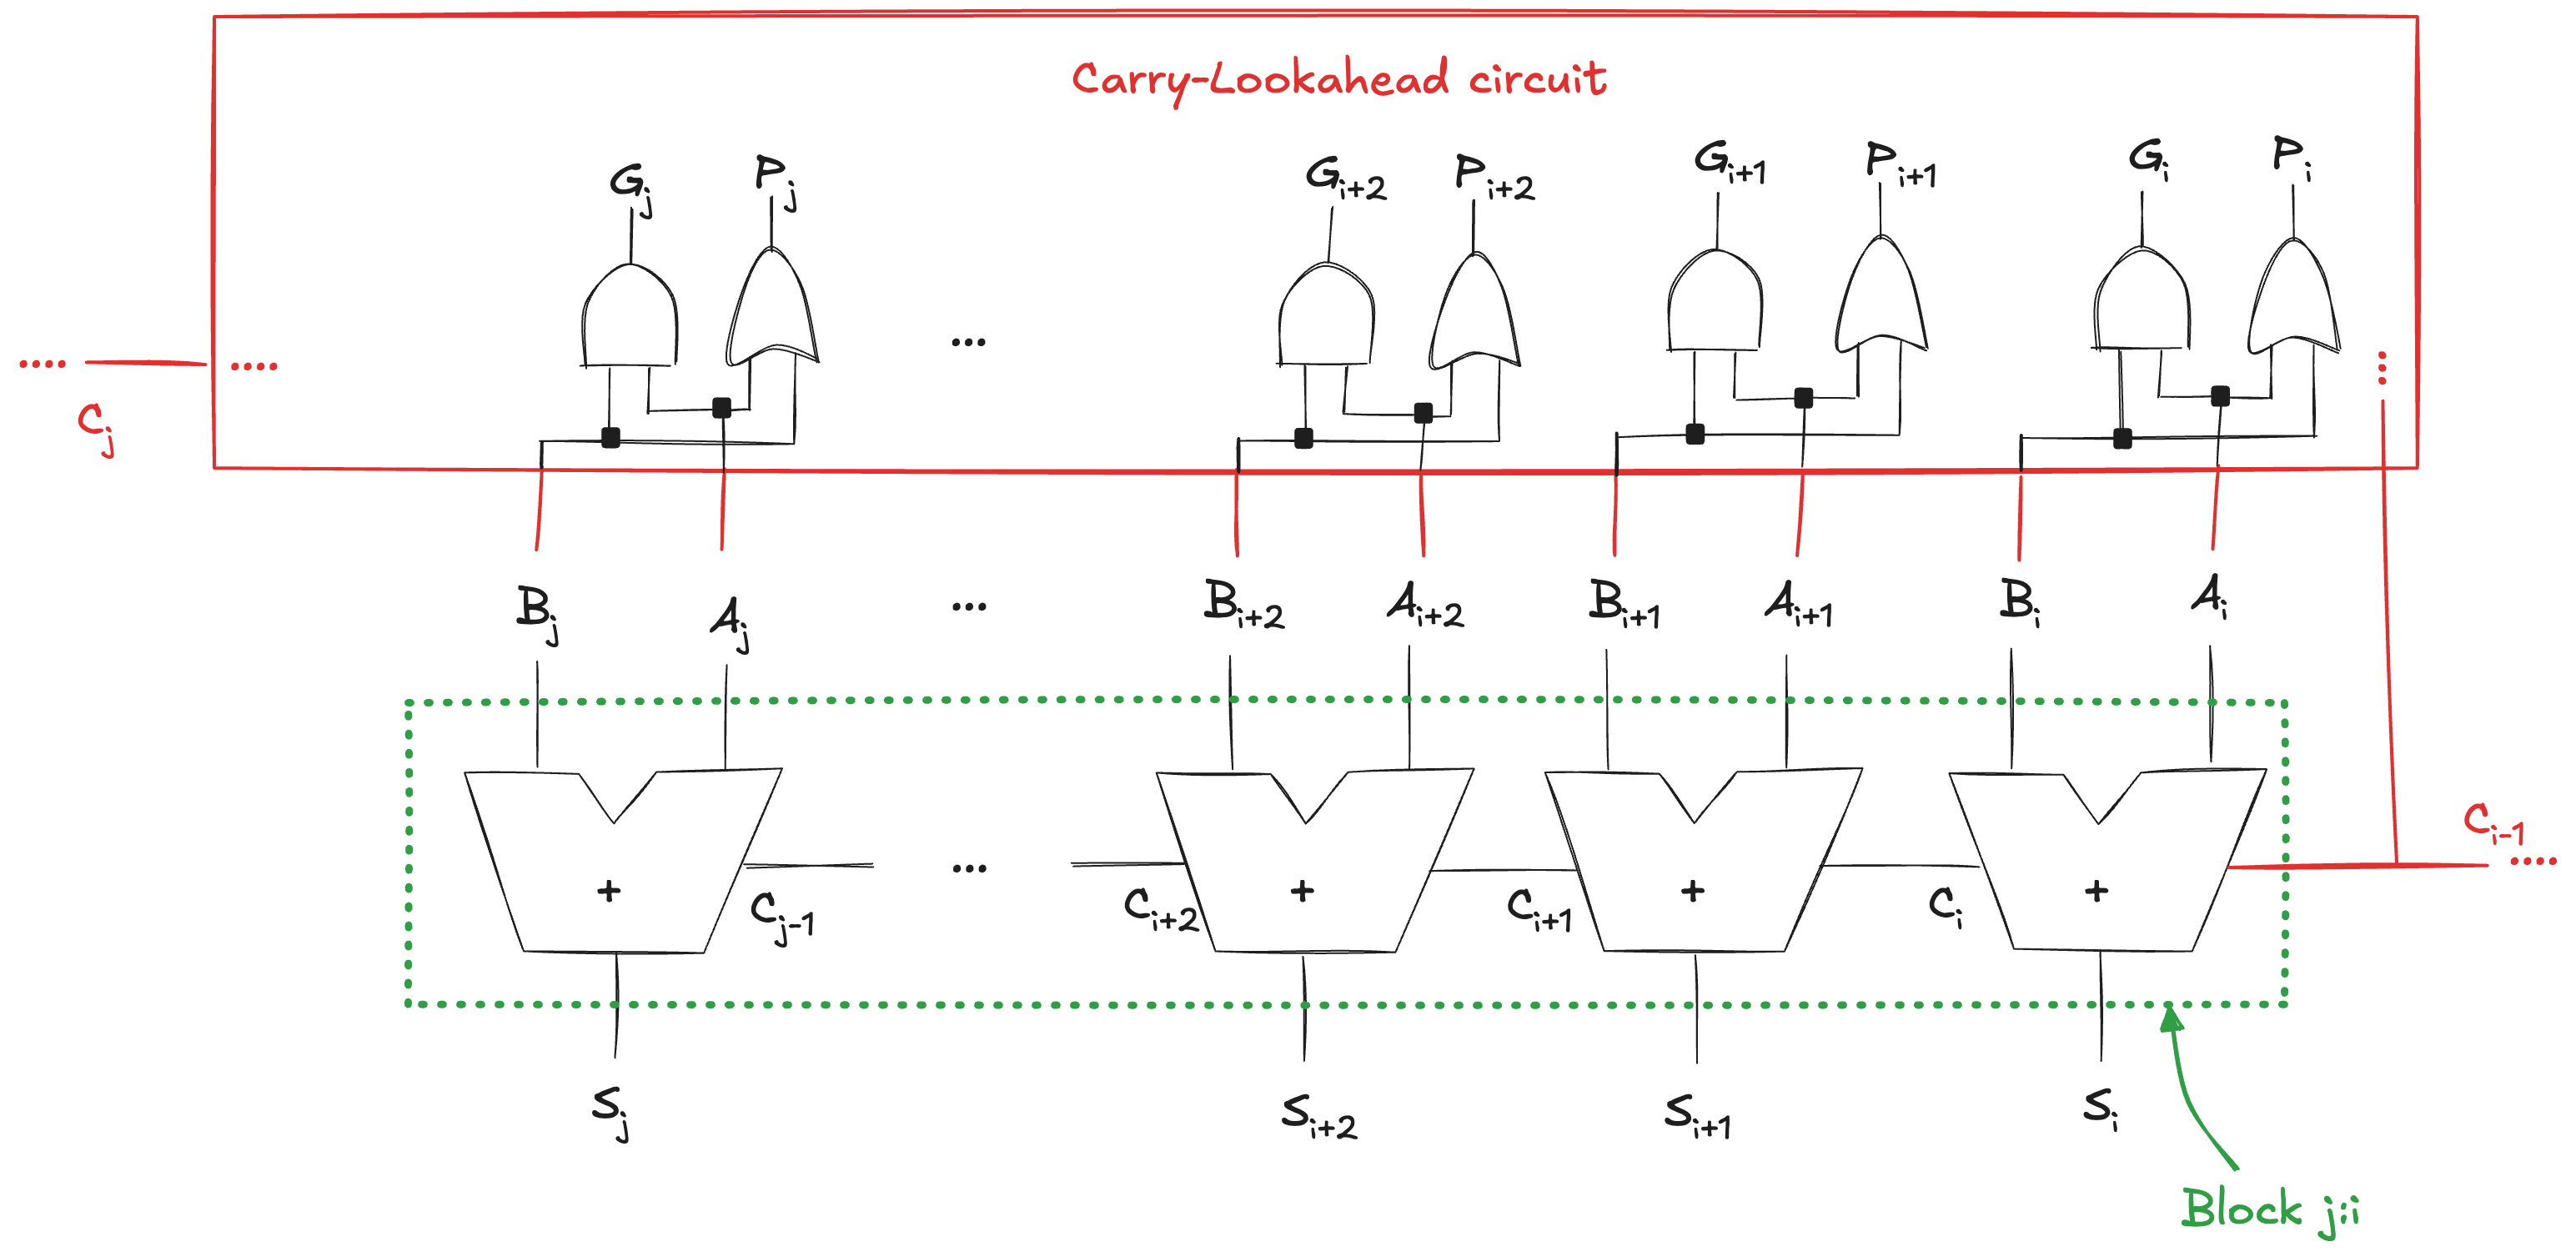

Using these definitions, we can rewrite the carry logic for a given bit position. A bit position will **produce a carry-out if it either generates a carry on its own or propagates an incoming carry**:

$\displaystyle C_i = G_i + P_i \; C_{i-1}$

The generate and propagate definitions **extend to multiple-bit blocks**. A block is said to generate a carry if it produces a carry out independent of the carry in to the block, and this happens if the most significant column generates a carry, or if the previous column generated a carry and the most significant column propagates it, and so forth:

$\displaystyle G_{j:i} = G_j + P_j \; ( \; G_{j-1} + P_{j-1} \; ( \; G_{j-2} + P_{j-2} \; ( \; ... \; ( \; G_{i+2} + P_{i+2} \; ( \; G_{i+1} + P_{i+1} \; G_i \; ) ..)))$

For example, the generate signal for the second 4-bit block is:

$\displaystyle G_{7:4} = G_7 + P_7 \; ( \; G_6 + P_6 \; ( \; G_5 + P_5 \; G_4 \; ) \; )$

A block is said to propagate a carry if it produces a carry-out whenever there is a carry-in to the block. This condition holds when all the individual bit positions within the block propagate the carry:

$\displaystyle P_{j:i} = P_j \; P_{j-1} \; P_{j-2} \; ... \; P_{i+2} \; P_{i+1} \; P_i$

For example, the propagaye signal for the second 4-bit block is:

$\displaystyle P_{7:4} = P_7 \; P_6 \; P_5 \; P_4$

Using the block generate and propagate signals, we can compute the carry out of the block:

$\displaystyle C_j = G_{j:i} + P_{j:i} \; C_{i-1}$

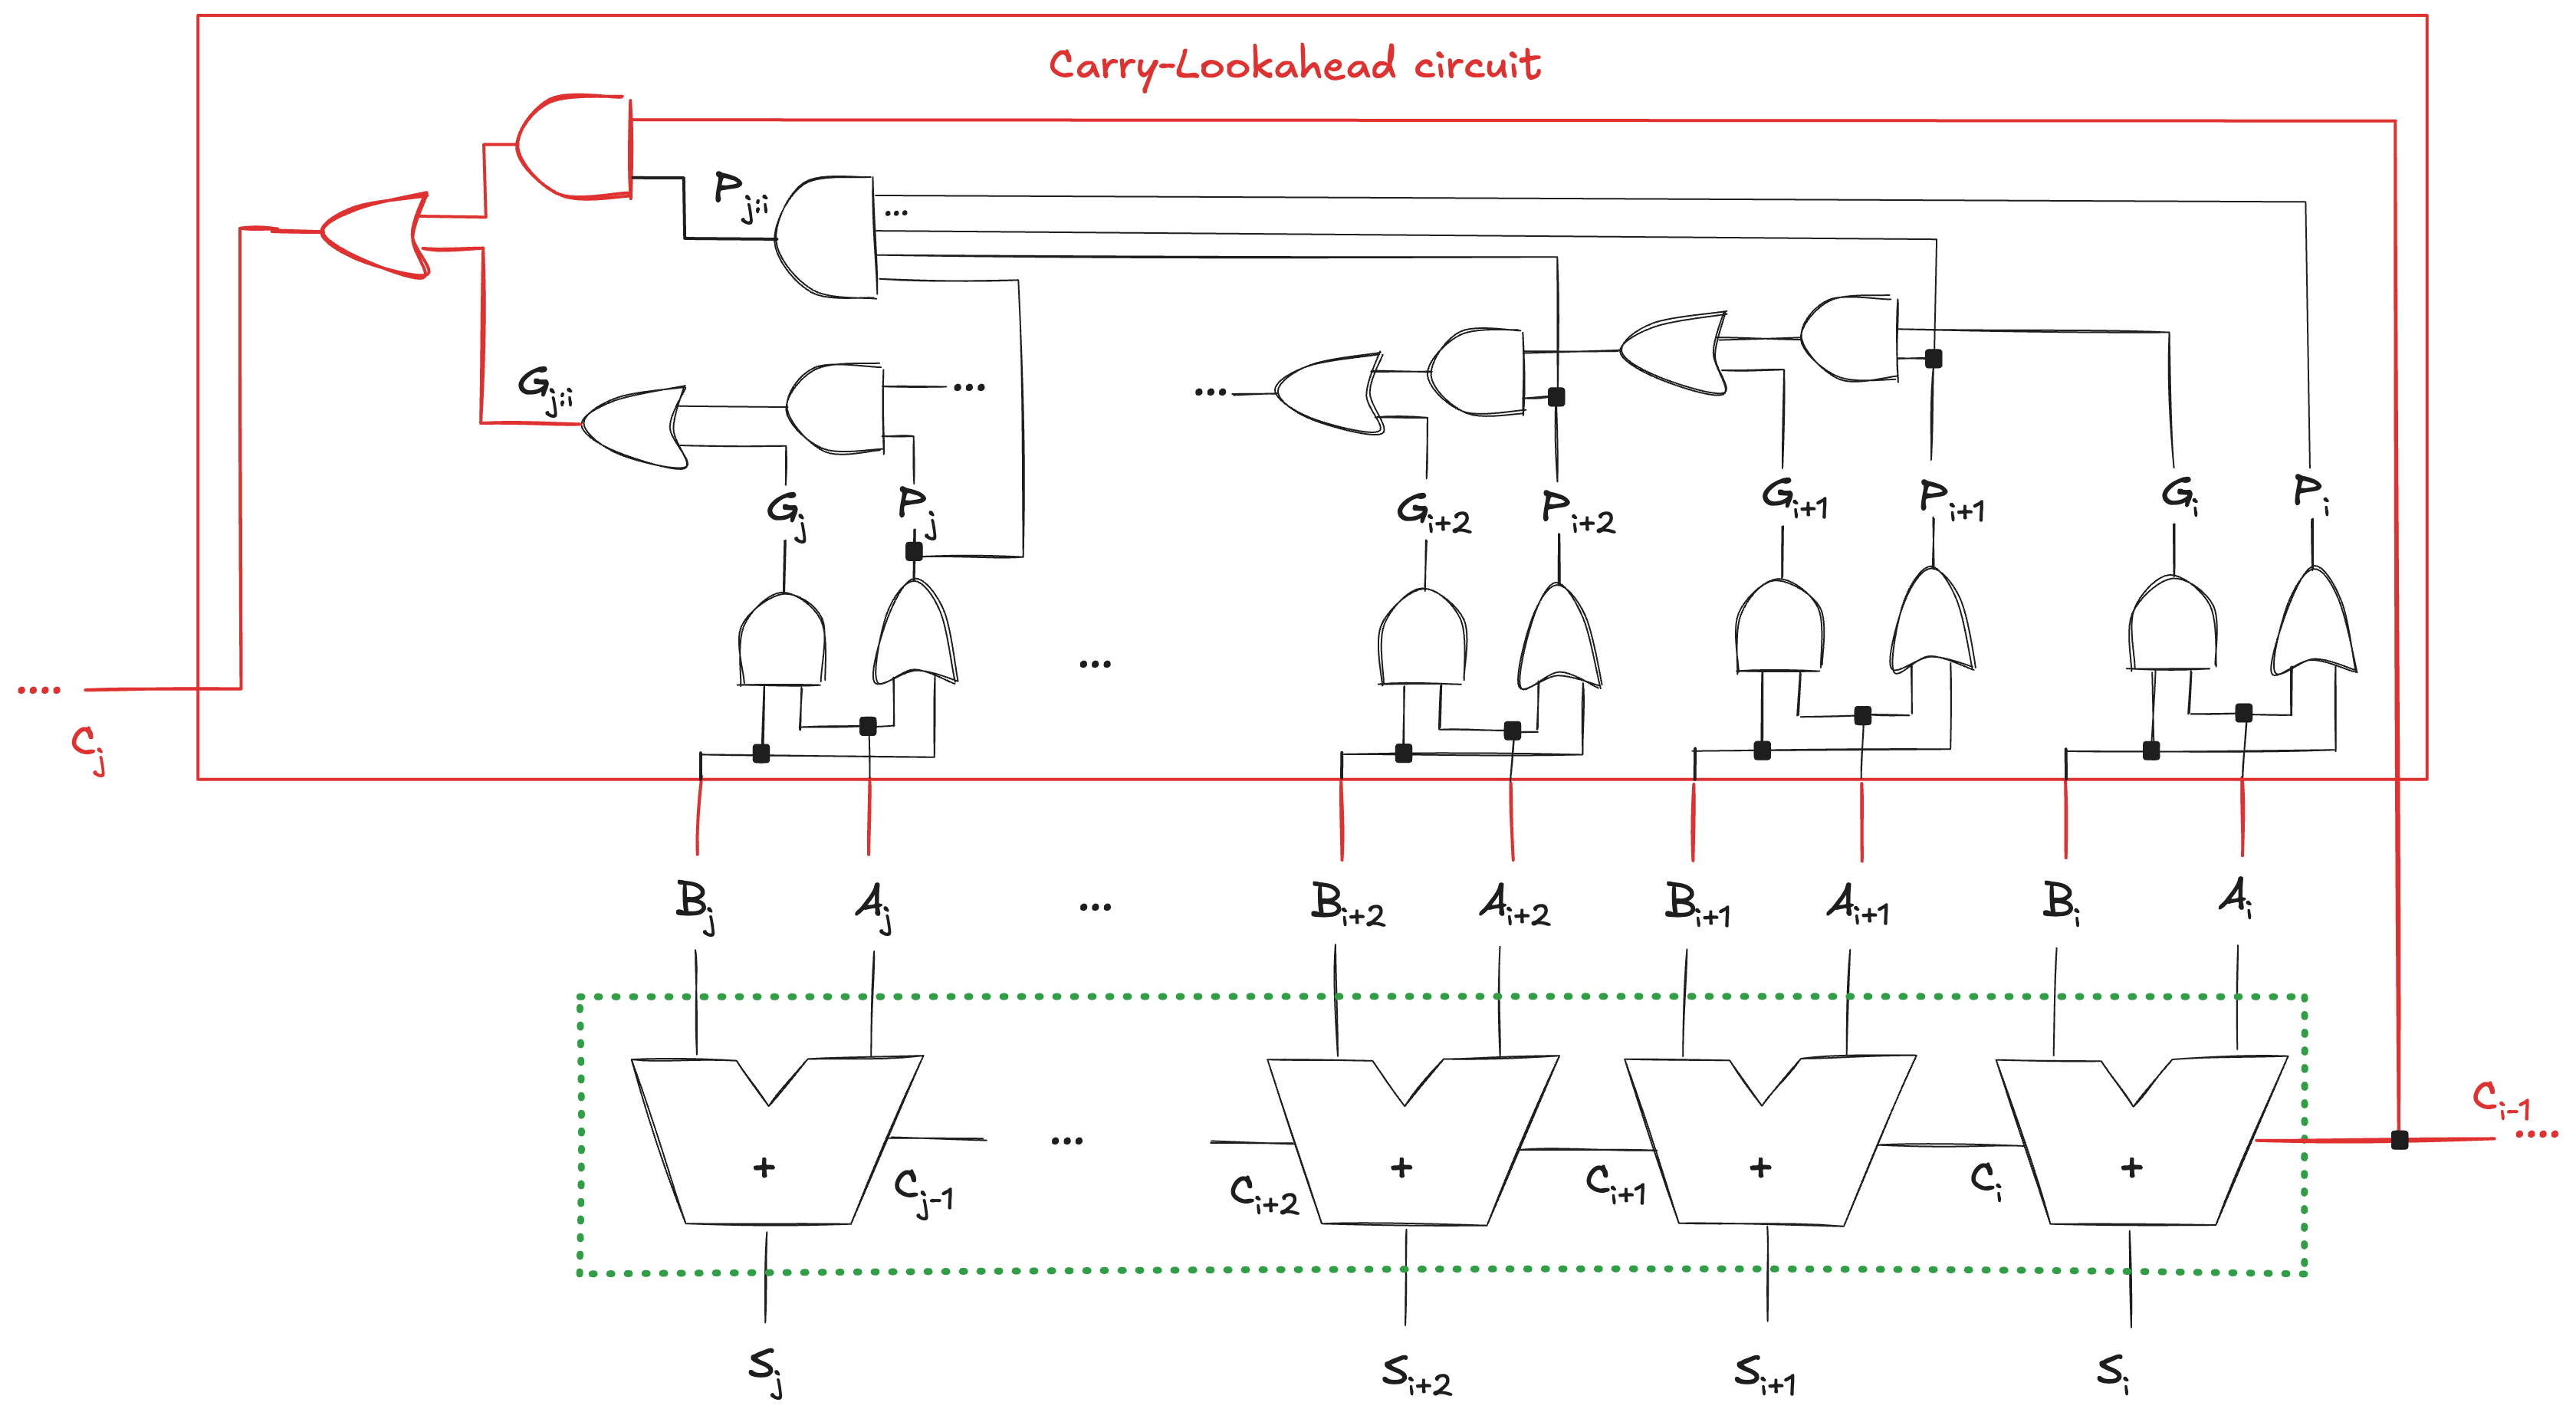

For example, a 32-bit carry-lookahead adder can be built from eight 4-bit blocks. Each block includes a 4-bit ripple-carry adder along with lookahead logic that computes the block’s carry-out based on its carry-in. The final block simply uses a ripple-carry adder, since no additional lookahead logic is needed beyond that point:

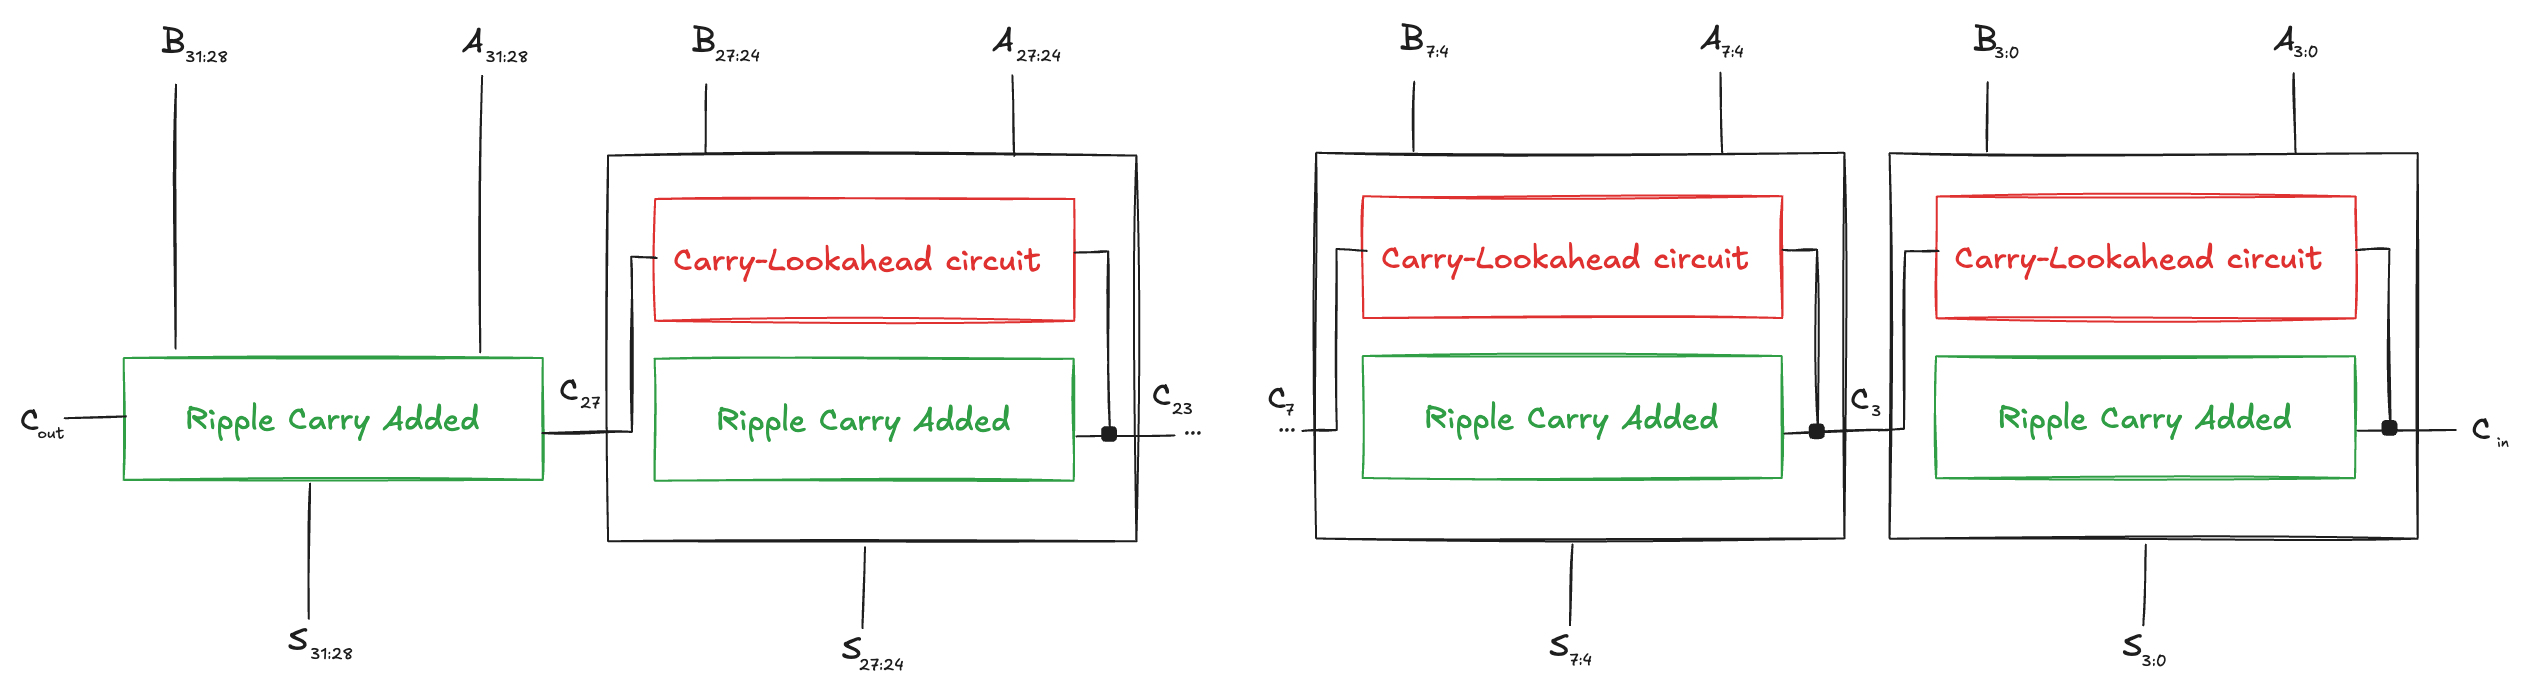

All CLA blocks compute their column-level and block-level generate and propagate signals in parallel. Once these signals are available, the carry-in propagates through the lookahead logic of each block to compute the carry-out for the next stage. Specifically, Cin is used to generate C3 in the first block, C3 is used to compute C7 in the second block, then C7 is used to generate C11, and so on, up to C27 in the final stage. The total delay is determined by the number of logic levels required to compute the carry signals across the blocks, rather than by the number of bits:

$\displaystyle t_{CLA} = t_{pg} + t_{pg-block} + (\frac{N}{k} - 1) \; t_{AND-OR} + k \; t_{FA}$

where:
- $\displaystyle t_{pg}$ is the time to compute column propagate and generate signals (a single AND or OR gate)
- $\displaystyle t_{pg-block}$ is the time to compute the block propagate and generate signals (this dependes on the number of bits in the block, for a 4-bit block it is 6 AND or OR gates) 
- $\displaystyle (N/k - 1)$ is the number of blocks that include lookahead logic, which equals the total number of bits divided by the number of bits per block, minus one (since the final block is a standard ripple-carry adder)
- $\displaystyle t_{AND-OR} + k$ is the time to compute the carry-out of a block,given the carry-in and the block generate and propagate signals (an AND and a OR gate for each block). This computation is done in sequence for each block, since it depends on the carry-in from the previous block.
- $\displaystyle t_{FA}$ is the time of a one bit full adder, wich is used k times in the last CRA blocck.

For N > 16, the carry-lookahead adder is generally much faster than the ripple-carry adder. However, the adder delay still increases linearly with N. For example, we compare the delay of a 32-bit ripple-carry adder and a 32-bit carry-lookahead adder with 4-bit blocks. We assume that each two-input gate delay is 100ps and that the full adder delay is 300ps:

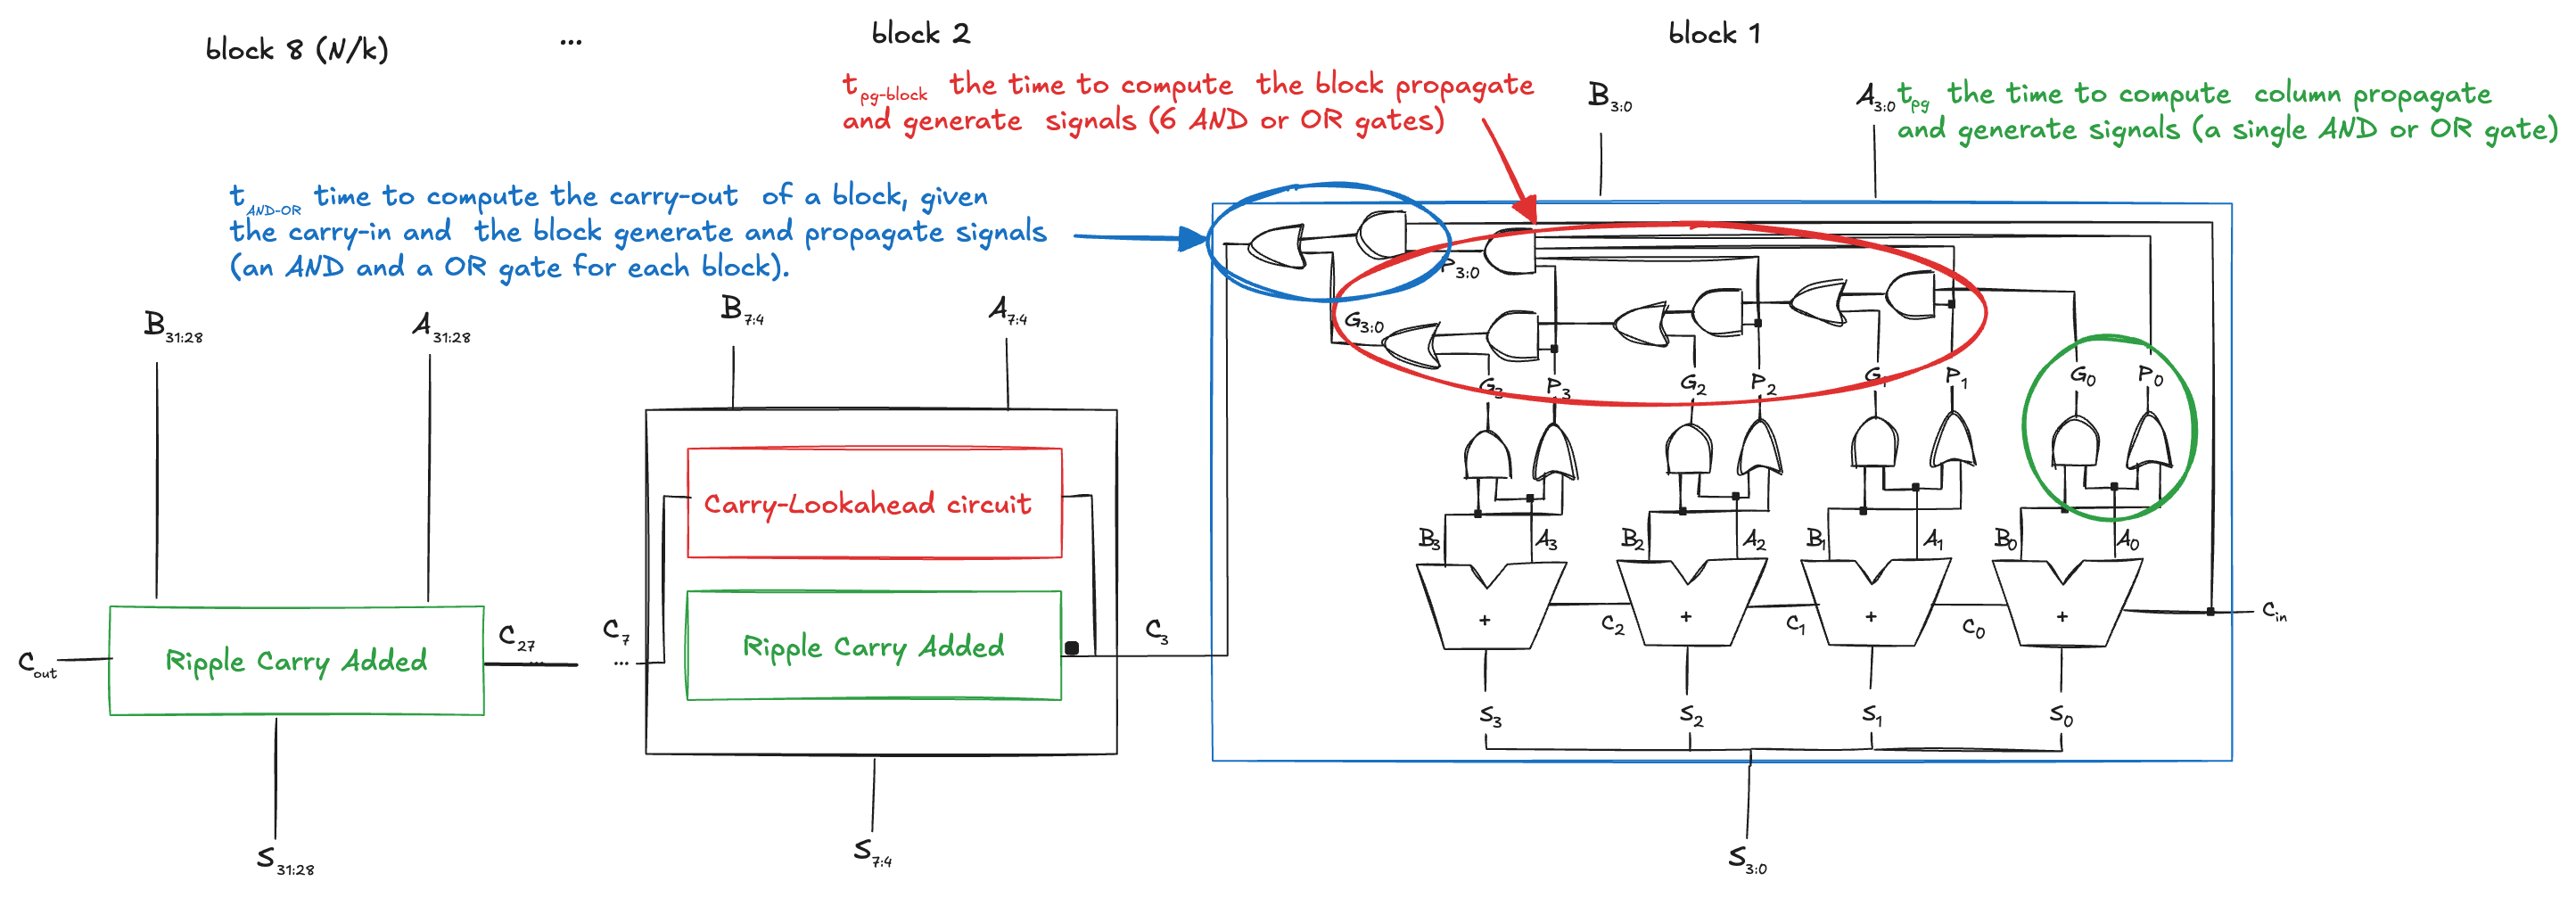

According to the previous equations:

$\displaystyle t_{ripple} = 32*300ps = 9.6ns$

$\displaystyle t_{CLA} = 100ps + 6*100ps + (32/4 - 1)*2*100ps + 4*300ps =  3.3ns$

In those conditions, the carry-lookahead adder is more three times faster than the ripple-carry adder. However, faster adders **require more hardware** and therefore are **more expensive** and **power-hungry**. These trade-offs must be considered when choosing an appropriate adder for a design. Modern synthesis tools select among many possible implementations, choosing the cheapest (smallest) design that meets the speed requirements. This greatly simplifies the designer’s job. The next VHDL code describes a CPA with carries in and out:

In [ ]:
entity adder is
    
    generic(N: integer := 8);
    
    port(A, B: in std_logic_vector(N–1 downto 0);
         C_in: in std_logic;
         S: out std_logic_vector(N–1 downto 0);
         C_out: out std_logic);
end;

architecture synth of adder is
    signal result: std_logic_vector(N downto 0);
begin
    result <= ("0" & A) + ("0" & B) + C_in;
    S <= result(N–1 downto 0);
    Cout <= result(N);
end;

## Subtractor

Recall that adders can add positive and negative numbers using two’s complement number representation. Subtraction is almost as easy, to compute:

$\displaystyle Y = A - B$

we simply create the two’s complement of B (inverting all bits of B and adding 1) and the add A:

$\displaystyle Y = A + \overline{B} + 1$

This sum can be performed with a single CPA by adding A + B with Cin = 1: 

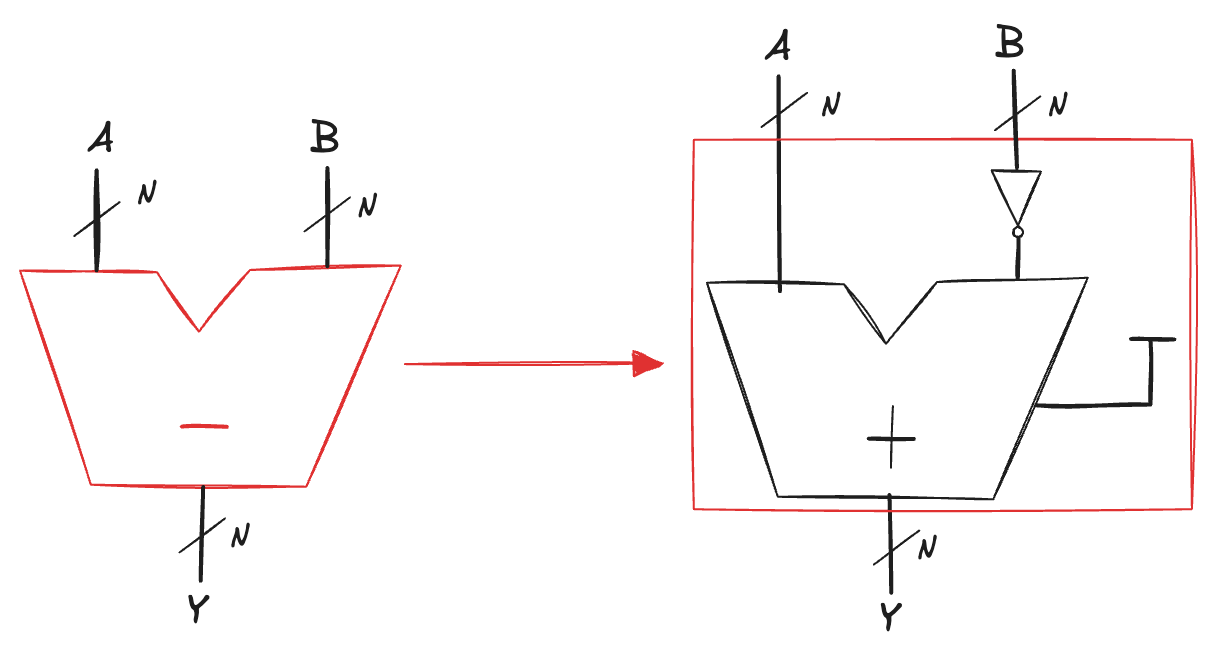


## Comparators

A comparator is a combinational circuit that determines whether two binary numbers are equal (**equality comparator**) or whether one is greater or less than the other (**magnitude comparator**). The equality comparator is simpler in hardware. 

### Equality comparator

An equality comparator  compares each corresponding bit of the two input numbers, A and B, using XNOR gates. If all bits in every column match, the output indicates that the numbers are equal:

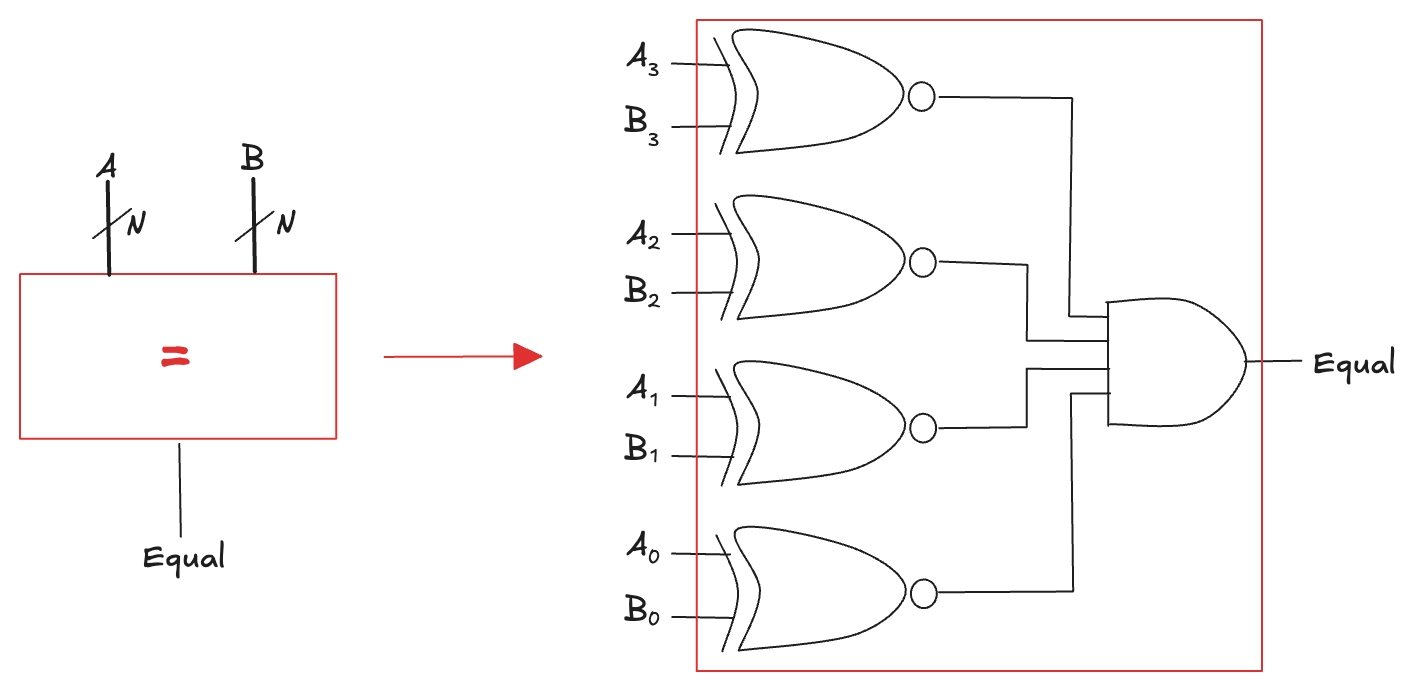

### Magnitude comparator

Magnitude comparison of signed numbers is typically performed by computing (A - B) and examining the sign bit (the most significant bit) of the result. If the result is negative (i.e., the sign bit is 1), then A < B; otherwise, A >= B. However, this method can give incorrect results in the presence of **overflow**. Overflow occurs when the sign of the result does not match the expected outcome based on the input signs, specifically when A and B have opposite signs and the sign bit of the result differs from the sign of A. To handle this correctly, we must detect this overflow condition and adjust the comparison accordingly:

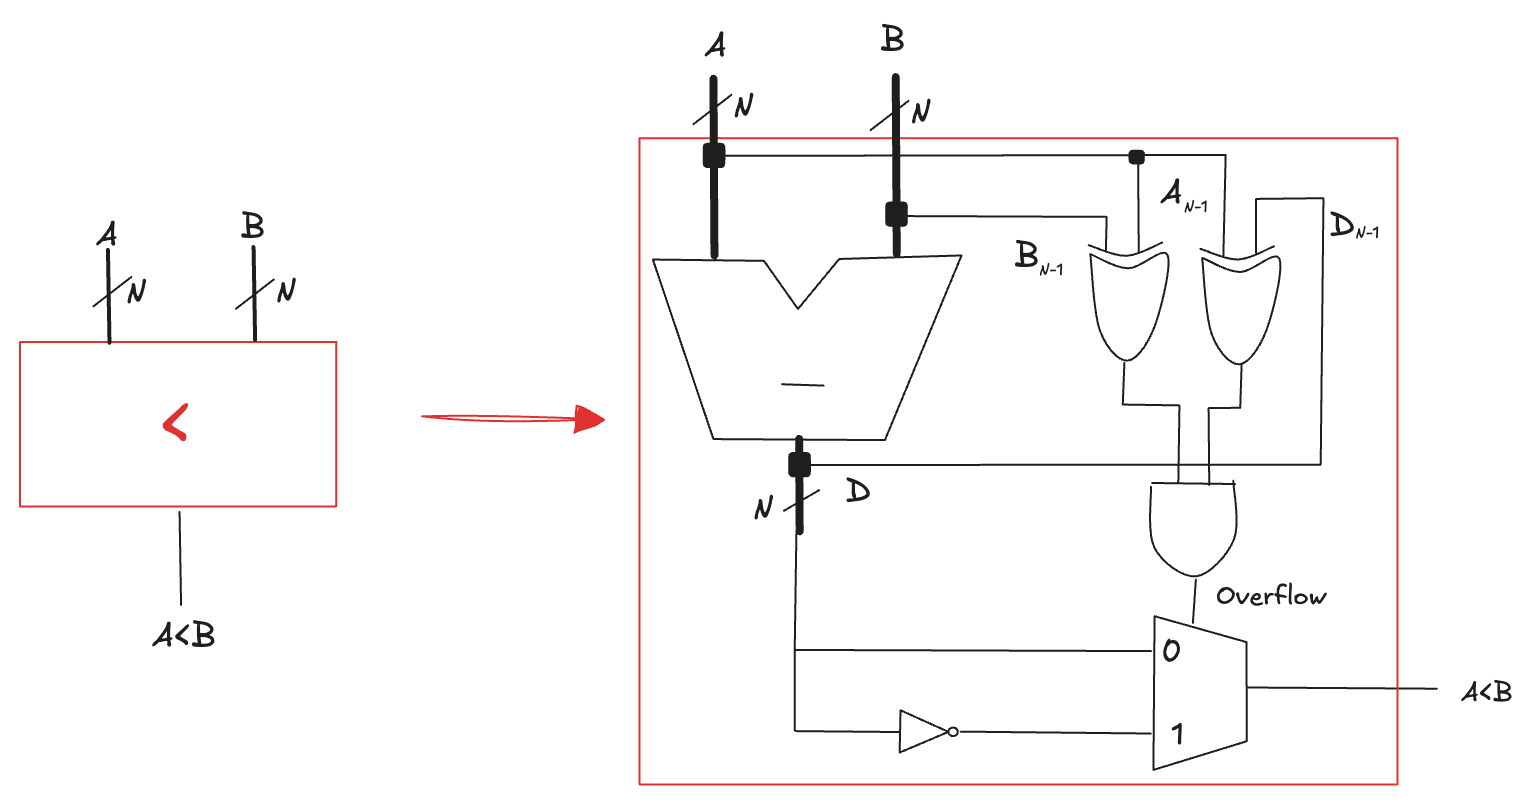


## Arithmetic/Logical Unit (ALU)

An **Arithmetic/Logic Unit (ALU)** integrates a range of arithmetic and logical operations into a single hardware block. A typical ALU can perform operations such as **addition**, **subtraction**, **bitwise AND**, and **bitwise OR**. The ALU is a central component of most computer architectures, responsible for executing the core computational tasks. To control which operation is executed, the ALU receives a **control signal** that selects the desired function. In diagrams, control signals are typically shown in a different color to distinguish them from **data signals**, which carry the actual operands and results.

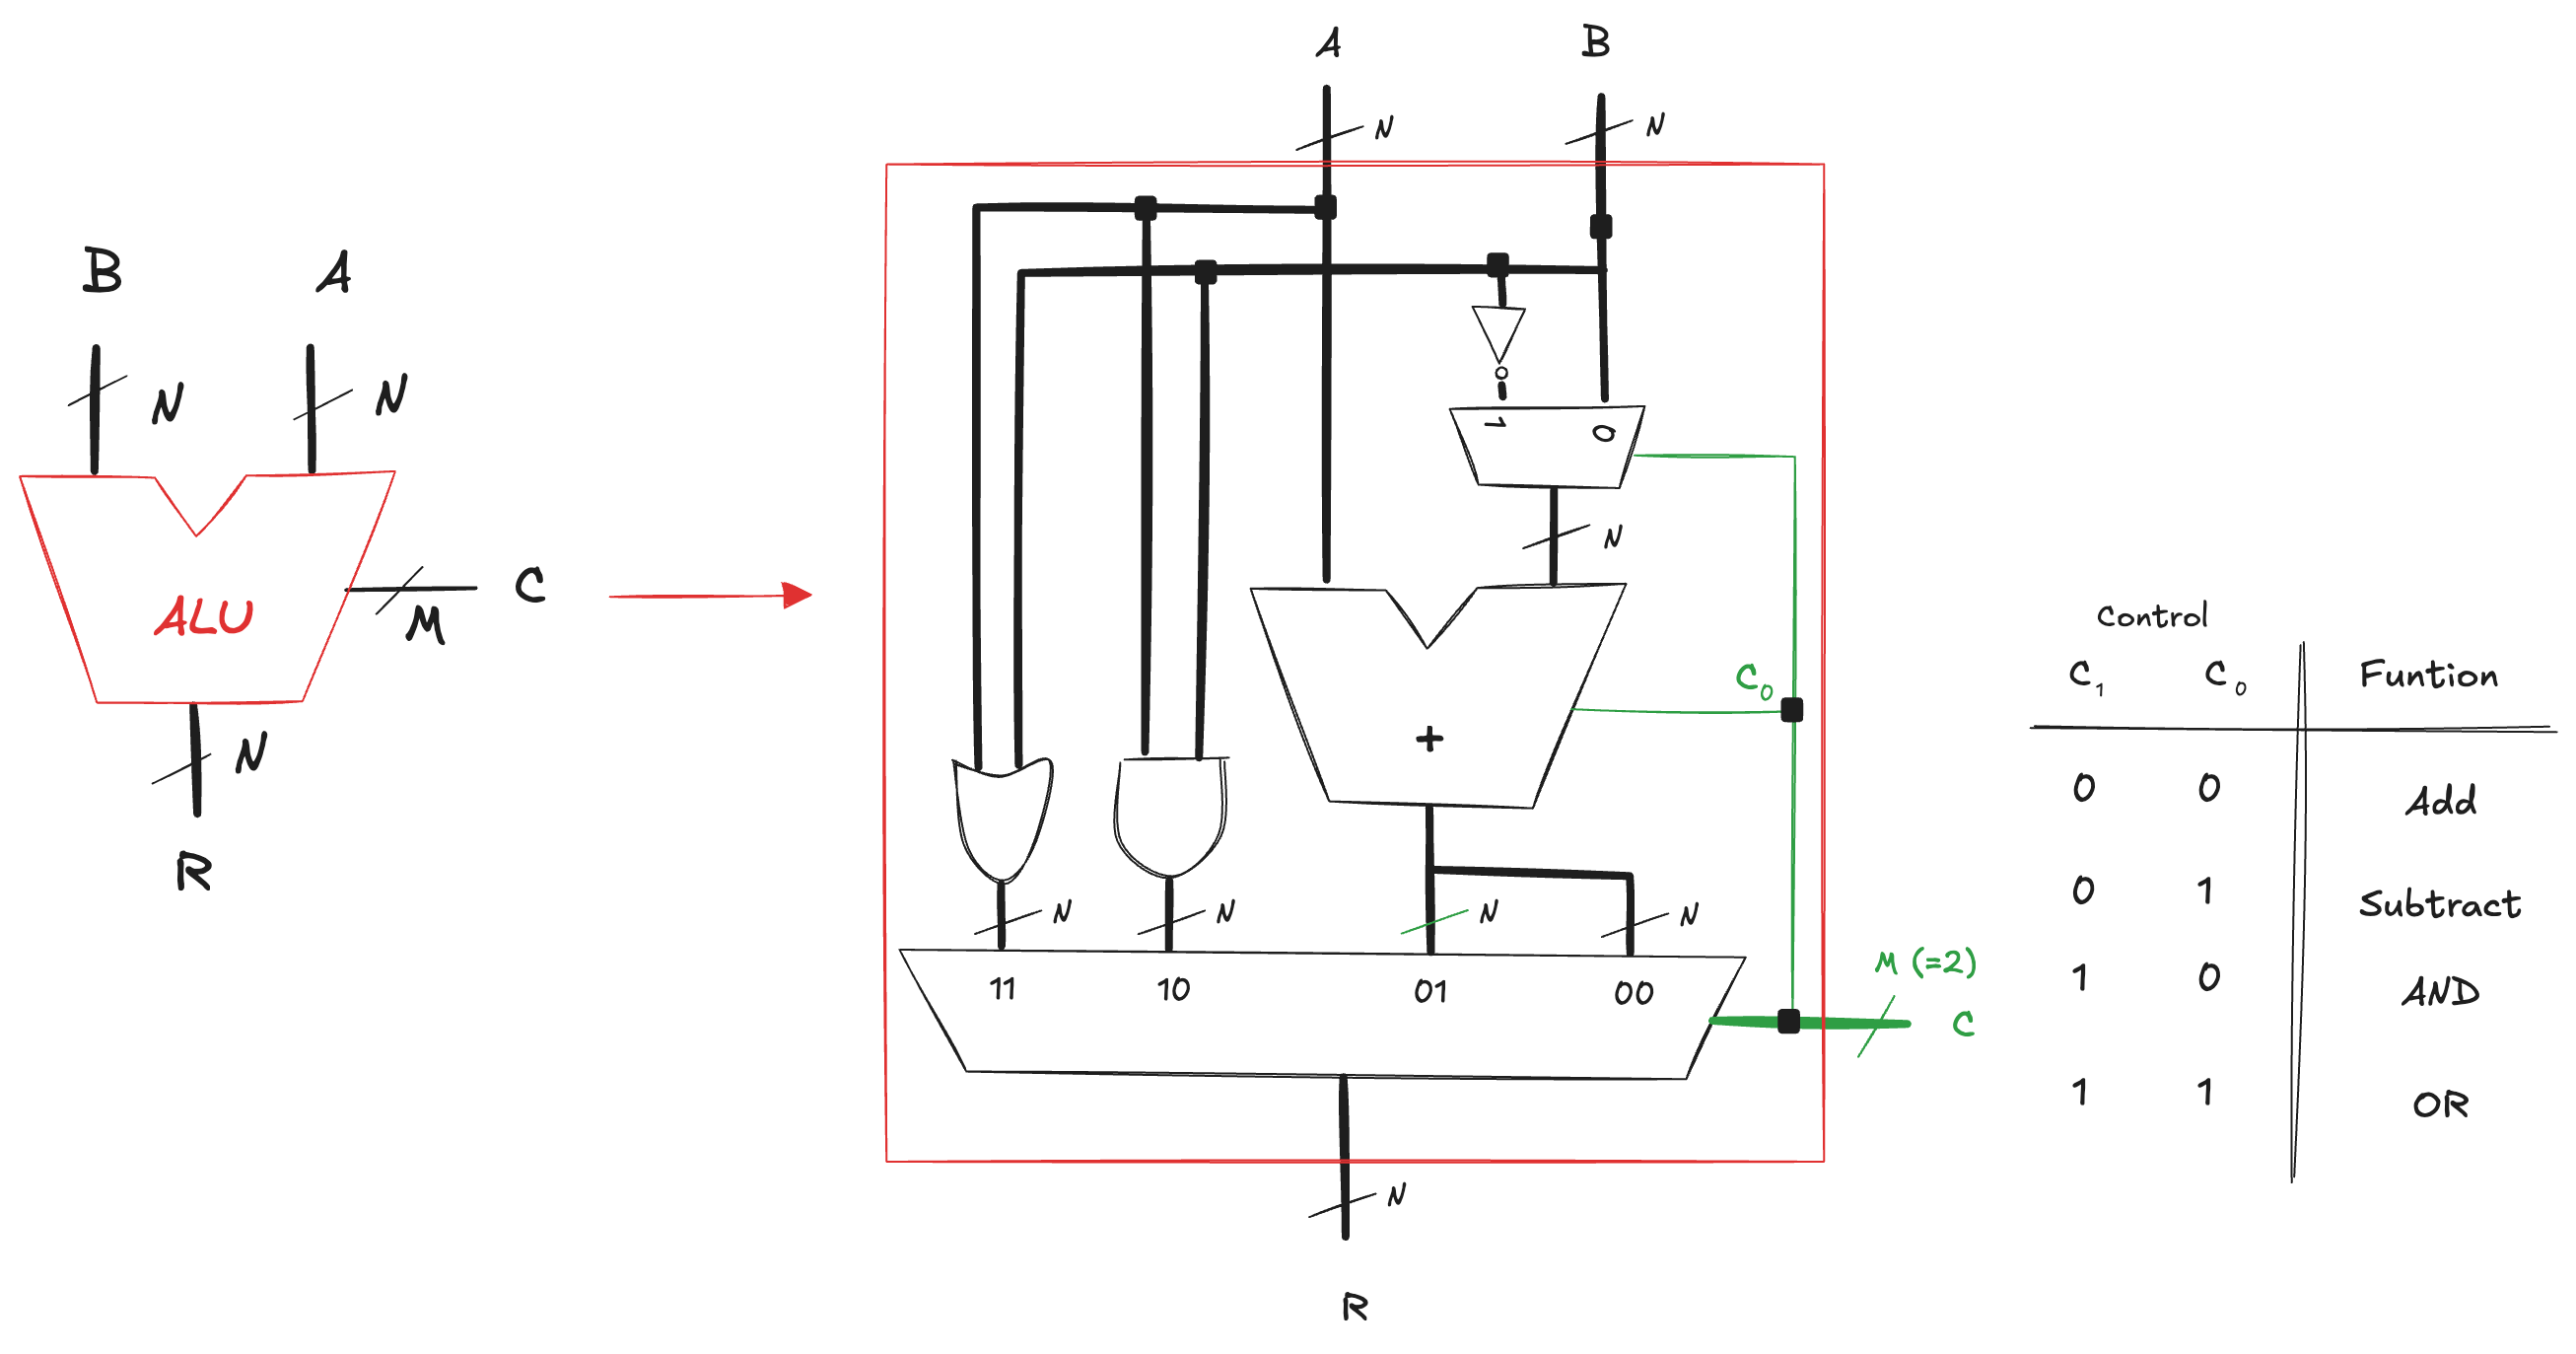

The ALU implementation includes an N-bit adder, along with N 2-input AND gates and N 2-input OR gates. It also incorporates inverters and a multiplexer to conditionally invert input B when the control signal C0 is asserted, enabling two’s complement subtraction. A 4:1 multiplexer selects the final output based on a 2-bit control signal C:
- C = 00: the multiplexer selects the sum output, computing the sum
- C = 01: the ALU performs subtraction, this is achieved by inverting B and setting the carry-in using C0 (which is 1), so the adder computes the two complement subtraction
- C = 10: the ALU outputs the bitwise AND
- C = 11: the ALU outputs the bitwise OR

Some ALUs produce extra outputs, called **flags**, that indicate information about the ALU output:

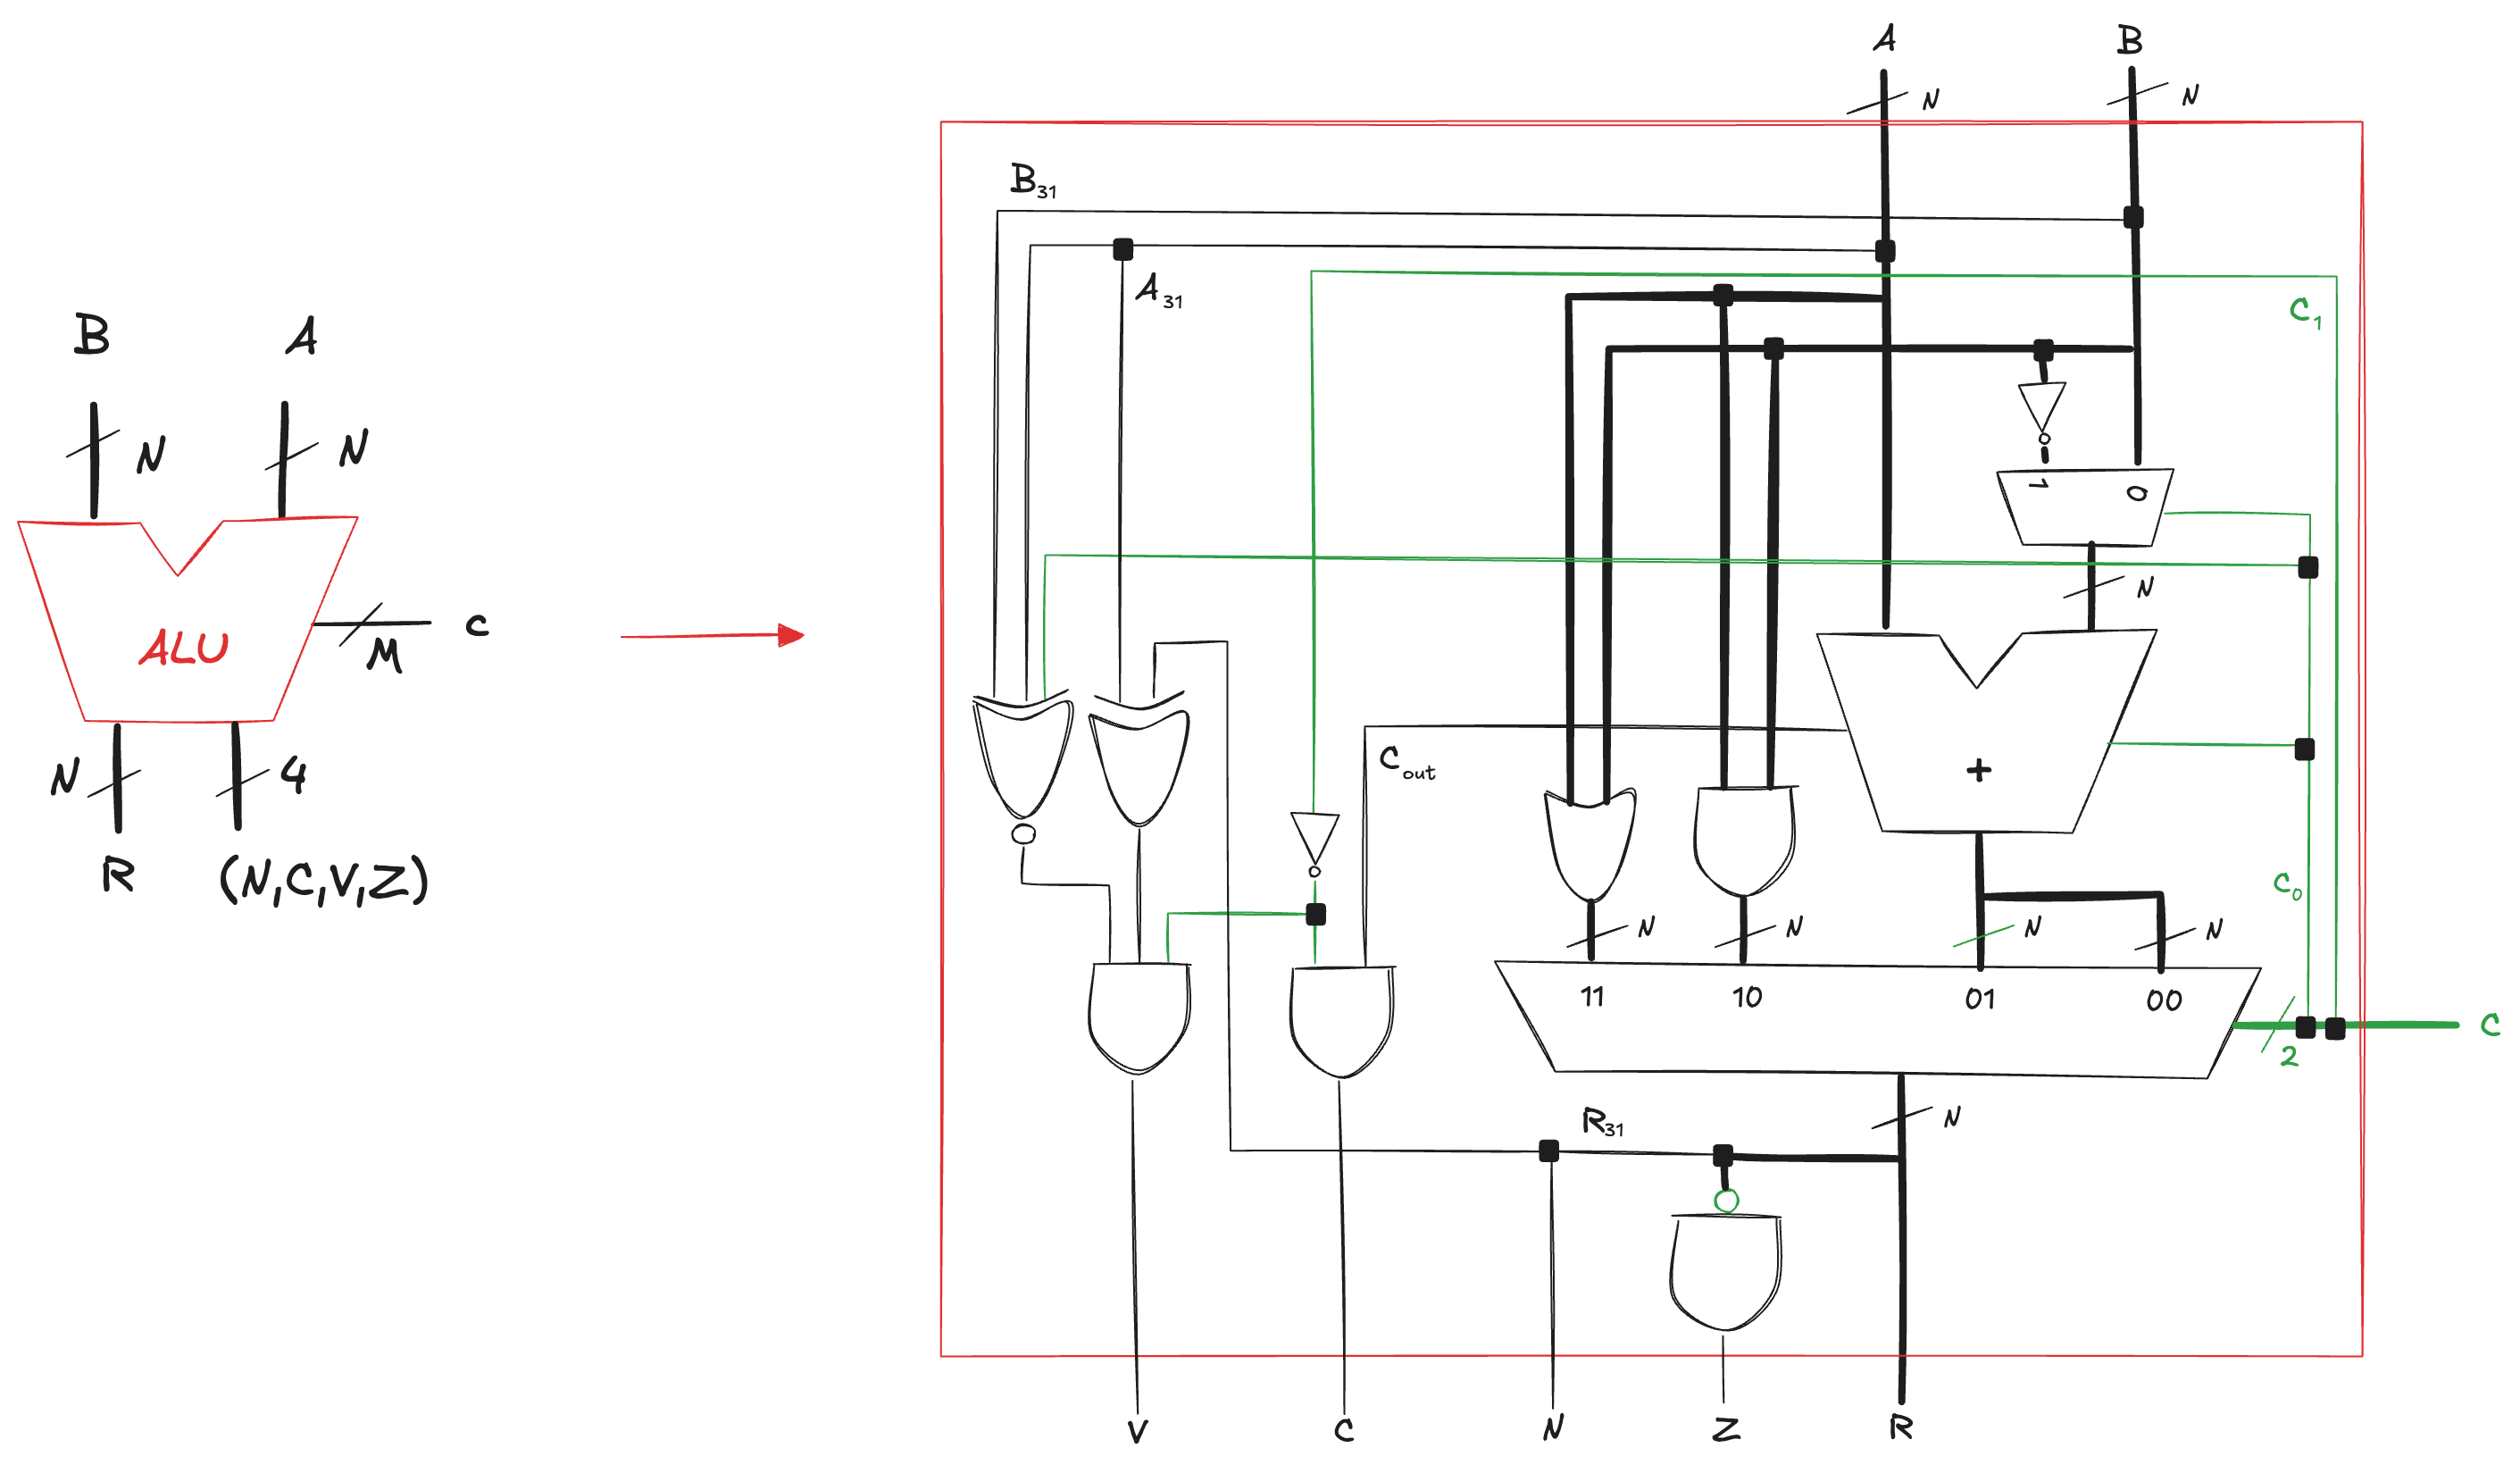

As shown in the schematic, the flags output is composed of the **N**, **Z**, **C**, and **V** flags. The most significant bit of a two’s complement number is 1 if it is negative and 0 otherwise. Thus, the **N (Negative) flag** is connected to the most significant bit of the ALU output. The **Z (Zero) flag** is asserted when all of the bits of the result are 0, as detected by the N-bit NOR gate. The **C (Carry out) flag** is asserted when the adder produces a carry out and the ALU is performing addition or subtraction (indicated C1 = 0). Overflow detection is trickier, as it depends on the operation being performed. So, the **V (oVerflow) flag** is asserted when all three of the following conditions are true:
- the ALU is performing addition or subtraction (C1 = 0),
- A and sum have opposite signs, as detected by the XOR gate,
- overflow is possible as detected by the XNOR gate: either A and B have the same sign and the adder is performing addition (C0 = 0) or A and B have opposite signs and the adder is performing subtraction (C0 = 1). The 3-input AND gate detects when all three conditions are true and asserts V. 

The ALU flags can also be used for comparisons:

| Comaparison | Signed numbers |
|-------------|----------------|
|     A = B   |     Z = 1      |
|     A < B   |     N = 1, V = 1, C = 0, Z = 0 |
|     A > B   |     N = 0, V = 0, C = 0, Z = 0 |

The ALU flags can also be used for comparisons, as shown in
Table 5.2. To compare inputs A and B, the ALU computes A − B and
looks at the flags. If Z is asserted, the result is 0, so A = B. Otherwise, A
is not equal to B.
Magnitude comparison is messier and depends on whether the numbers
are signed or unsigned. For example, to determine A < B, we compute
A − B and check whether the result is negative. If the numbers are
unsigned, the result is negative if there is no carry out.1 If the numbers
are signed, we can’t rely on the carry because small negative numbers
are represented in the same way as large positive unsigned numbers.
Instead, we simply compute A − B and see whether the answer is negative,
indicated by the N flag. However, if overflow occurs, the N flag
will be incorrect. Hence, A is less than B if N ⊕ V (in other words, if
the answer is negative and there is no overflow or if the answer is positive
but overflow occurred). In summary, let us define L (the Less than
signal) to be true if A < B. For unsigned numbers, L = C. For signed